In [2]:
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
import pandas as pd

Experiment 1:

M1
   => M3 => M4 => M5 => M6 => M7 
M2

All machines have 100s as operation time.

In [50]:
csv_file_path = 'results/results.csv'
data = {}
with open(csv_file_path, newline='') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    for row in csv_reader:
        row['Mean Idle Times'] = ast.literal_eval(row['Mean Idle Times'])
        row['Sum Idle Times'] = ast.literal_eval(row['Sum Idle Times'])
        row['Downtime'] = ast.literal_eval(row['Downtime'])
        row['Mean CT'] = ast.literal_eval(row['Mean CT'])

        data[row['Experiment']] = row

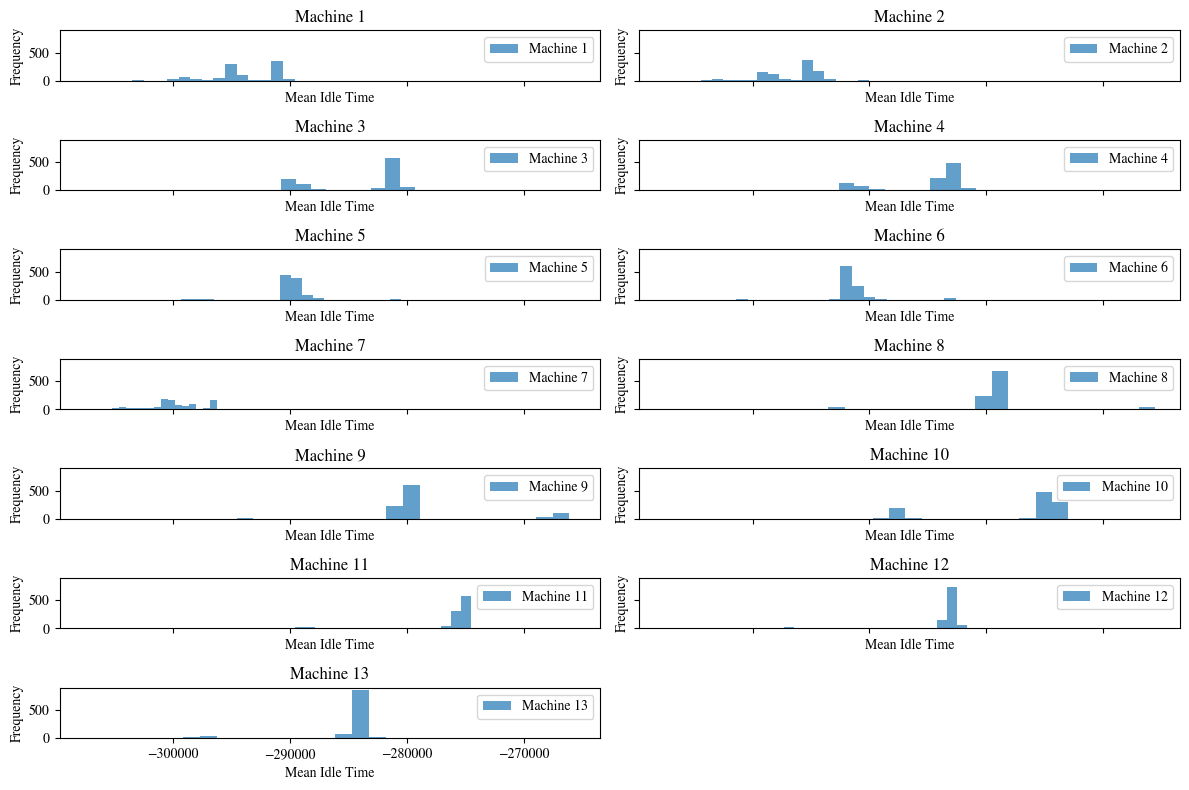

In [51]:
import matplotlib.pyplot as plt

machine_mean_idle_times = {}

for experiment, row in data.items():
    for machine_num, idle_time in enumerate(row['Mean Idle Times'], start=1):
        if machine_num not in machine_mean_idle_times:
            machine_mean_idle_times[machine_num] = []
        machine_mean_idle_times[machine_num].append(idle_time)

num_machines = len(machine_mean_idle_times)
num_rows = (num_machines // 2) + (num_machines % 2)  

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for machine_num, ax in zip(sorted(machine_mean_idle_times.keys()), axes):
    mean_idle_times = machine_mean_idle_times[machine_num]
    ax.hist(mean_idle_times, bins=20, label=f'Machine {machine_num}', alpha=0.7)
    ax.set_title(f'Machine {machine_num}')
    ax.set_xlabel('Mean Idle Time')
    ax.set_ylabel('Frequency')
    ax.legend()

if num_machines % 2 == 1:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()




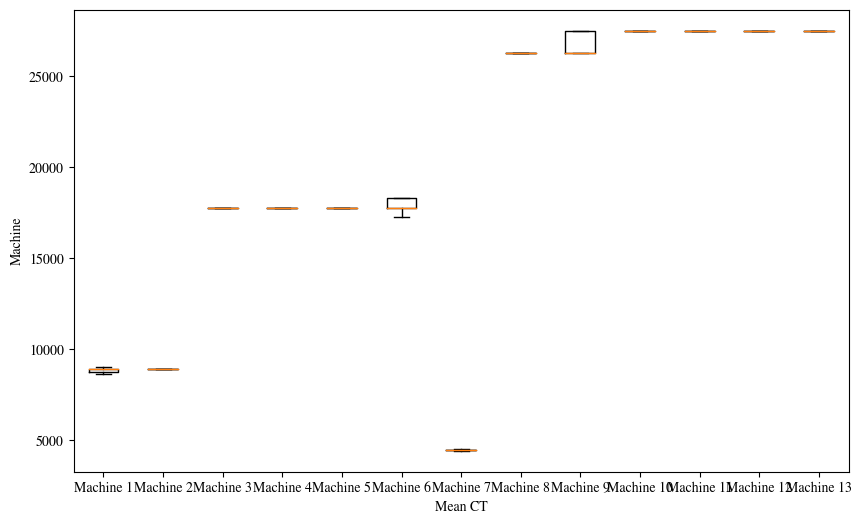

In [52]:
import matplotlib.pyplot as plt
import numpy as np

mean_ct_values_per_machine = {}
for experiment, row in data.items():
    for machine_num, _ in enumerate(row['Mean Idle Times'], start=1): 
        machine_mean_ct_values = []
        
        for row in data.values():
            machine_mean_ct_values.append(row['Mean CT'][machine_num - 1])
        
        mean_ct_values_per_machine[f'Machine {machine_num}'] = machine_mean_ct_values
        
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(mean_ct_values_per_machine.values(), vert=True, labels=mean_ct_values_per_machine.keys(), sym='.', showfliers=False)
#ax.set_title('Boxplot of Mean CT per Machine')
ax.set_xlabel('Mean CT')
ax.set_ylabel('Machine')
plt.show()

#### Line Cycle Time Analysis

In [53]:
import pandas as pd

mean_ct_values_per_machine = {}

for experiment, row in data.items():
    for machine_num, _ in enumerate(row['Mean Idle Times'], start=1): 
        machine_mean_ct_values = []
        
        for row in data.values():
            machine_mean_ct_values.append(row['Mean CT'][machine_num - 1])
        
        mean_ct_values_per_machine[f'Machine {machine_num}'] = machine_mean_ct_values

descriptive_df = pd.DataFrame()

for machine, values in mean_ct_values_per_machine.items():
    descriptive_df[machine] = values

descriptive_stats = descriptive_df.describe().transpose()

print("Descriptive Analysis of Mean CT per Machine:")
print(descriptive_stats)


Descriptive Analysis of Mean CT per Machine:
             count          mean           std           min           25%  \
Machine 1   1000.0   8835.111297  7.420871e+01   8518.309859   8765.217391   
Machine 2   1000.0   8867.723822  6.429237e+01   8640.000000   8894.117647   
Machine 3   1000.0  17666.797861  2.181372e+02  17280.000000  17788.235294   
Machine 4   1000.0  17705.516150  1.936334e+02  17280.000000  17788.235294   
Machine 5   1000.0  17790.822674  9.406648e+01  17280.000000  17788.235294   
Machine 6   1000.0  17947.821176  2.472823e+02  17280.000000  17788.235294   
Machine 7   1000.0   4454.856530  4.017686e+01   4351.079137   4447.058824   
Machine 8   1000.0  26507.212648  4.564204e+02  26295.652174  26295.652174   
Machine 9   1000.0  26766.583399  5.843364e+02  26295.652174  26295.652174   
Machine 10  1000.0  27456.246640  2.006722e+02  26295.652174  27490.909091   
Machine 11  1000.0  27490.909091  1.091940e-11  27490.909091  27490.909091   
Machine 12  1000.0 

Descriptive Analysis of Cycle Time:
        Cycle Time
count  1000.000000
mean   4535.097647
std      28.230297
min    4480.000000
25%    4513.432836
50%    4513.432836
75%    4547.368421
max    4616.793893
Number of Outliers: 7


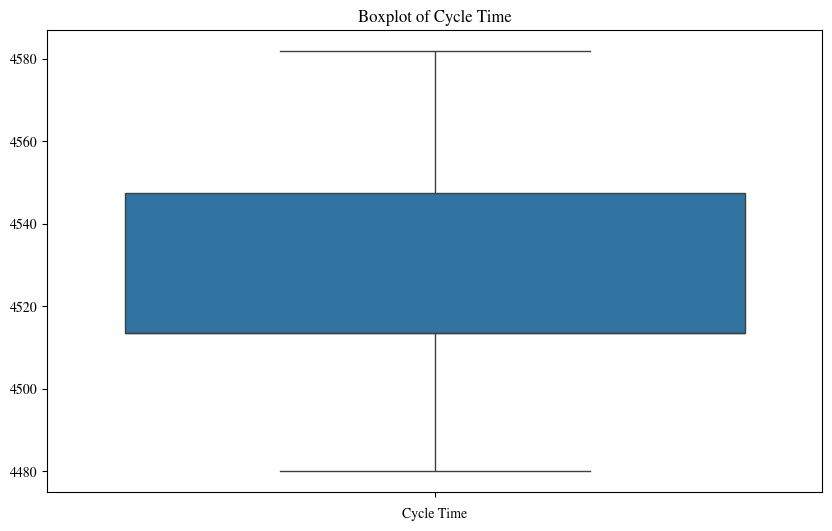

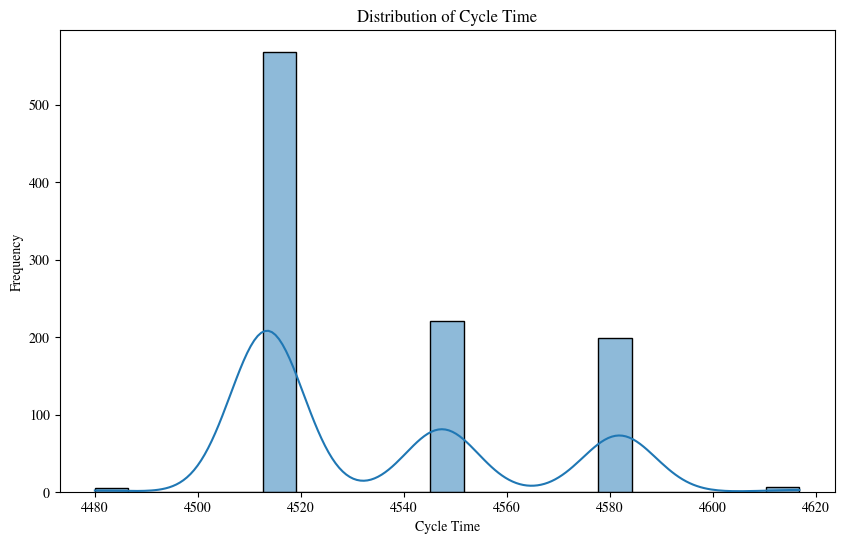

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

cycle_time_values = [float(row['Cycle Time']) for row in data.values()]

cycle_time_df = pd.DataFrame({'Cycle Time': cycle_time_values})
cycle_time_descriptive_stats = cycle_time_df.describe()

q1 = np.percentile(cycle_time_values, 25)
q3 = np.percentile(cycle_time_values, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [value for value in cycle_time_values if value < lower_bound or value > upper_bound]
num_outliers = len(outliers)

print("Descriptive Analysis of Cycle Time:")
print(cycle_time_descriptive_stats)
print(f"Number of Outliers: {num_outliers}")
plt.figure(figsize=(10, 6))
sns.boxplot(y=cycle_time_values, showfliers=False)
plt.title('Boxplot of Cycle Time')
plt.xlabel('Cycle Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(cycle_time_values, kde=True)
plt.title('Distribution of Cycle Time')
plt.xlabel('Cycle Time')
plt.ylabel('Frequency')
plt.show()

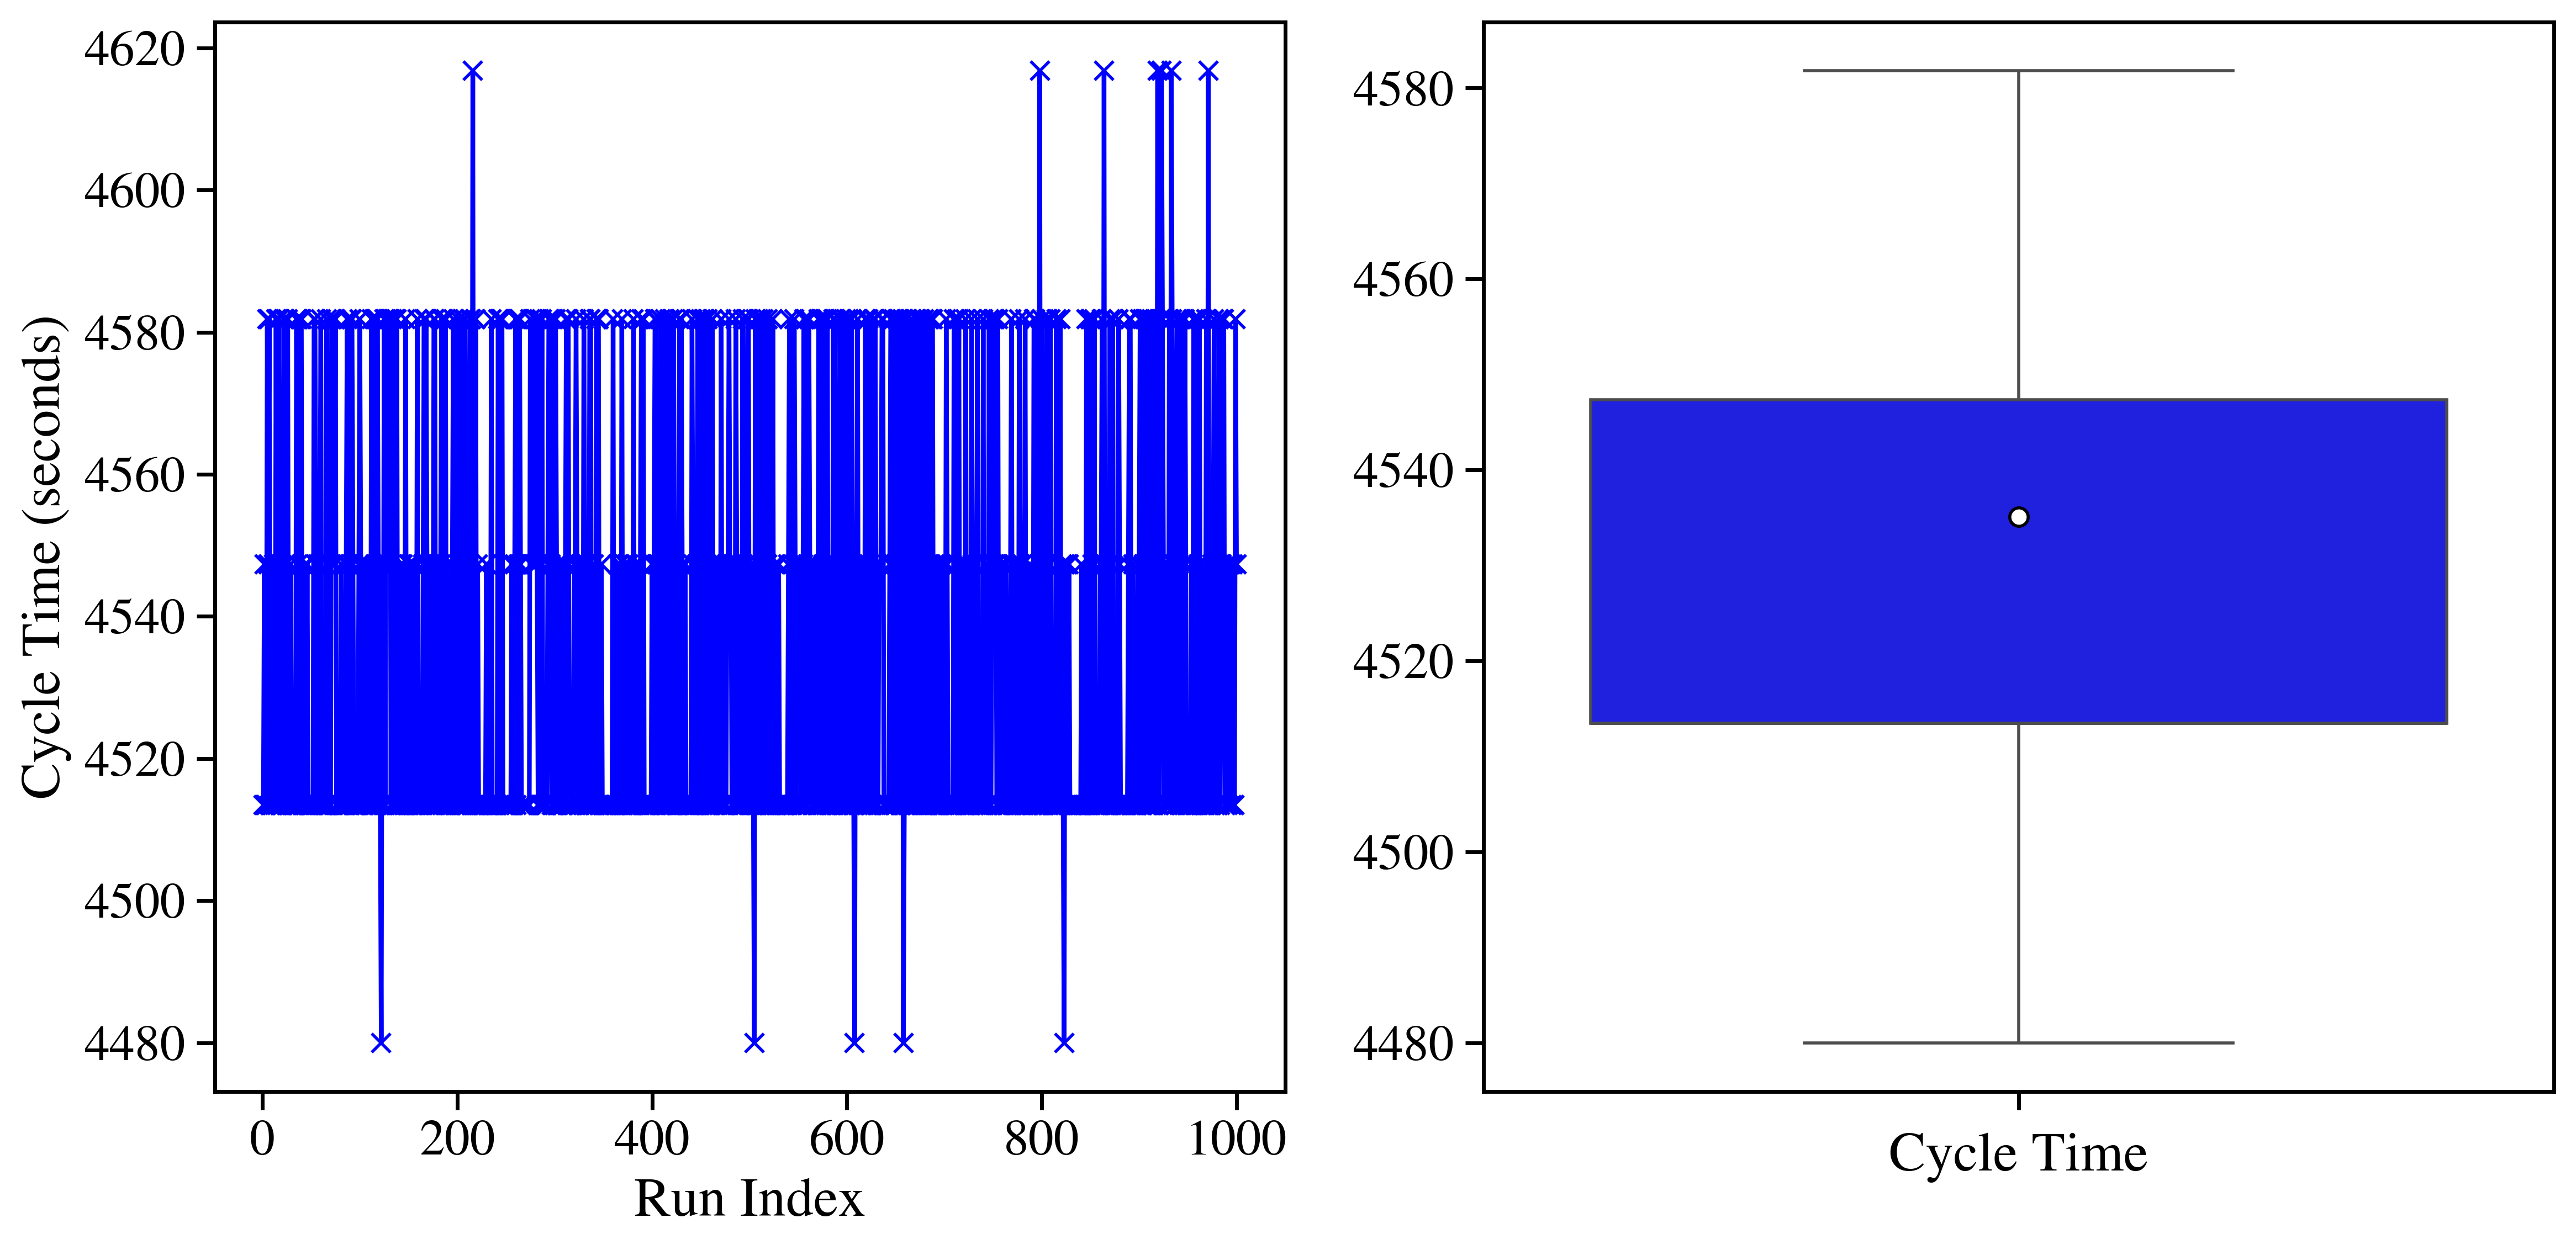

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
# Filter out outliers
filtered_cycle_time_values = [value for value in cycle_time_values if value >= lower_bound and value <= upper_bound]

plt.figure(figsize=(12, 6), dpi=400)
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cycle_time_values) + 1), cycle_time_values, marker='x', linestyle='-', color='b')
plt.xlabel('Run Index')
plt.ylabel('Cycle Time (seconds)')

# Create a run order plot without outliers
plt.subplot(1, 2, 2)
cycle_time_values = [float(row['Cycle Time']) for row in data.values()]

cycle_time_df = pd.DataFrame({'Cycle Time': cycle_time_values})
cycle_time_descriptive_stats = cycle_time_df.describe()

q1 = np.percentile(cycle_time_values, 25)
q3 = np.percentile(cycle_time_values, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [value for value in cycle_time_values if value < lower_bound or value > upper_bound]
num_outliers = len(outliers)

sns.boxplot(y=cycle_time_values, showfliers=False, color='blue', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
plt.xlabel('Cycle Time')

plt.tight_layout()
plt.savefig('ctdynamic_boxplot.pdf') 
plt.show()


In [ ]:
results = {"7 days":1.25, "14 days":2.47, "30 days":4.85, "60 days": 9.58, "90 days":13.99, "180 days": 27.85, "365 days": 53.15 }

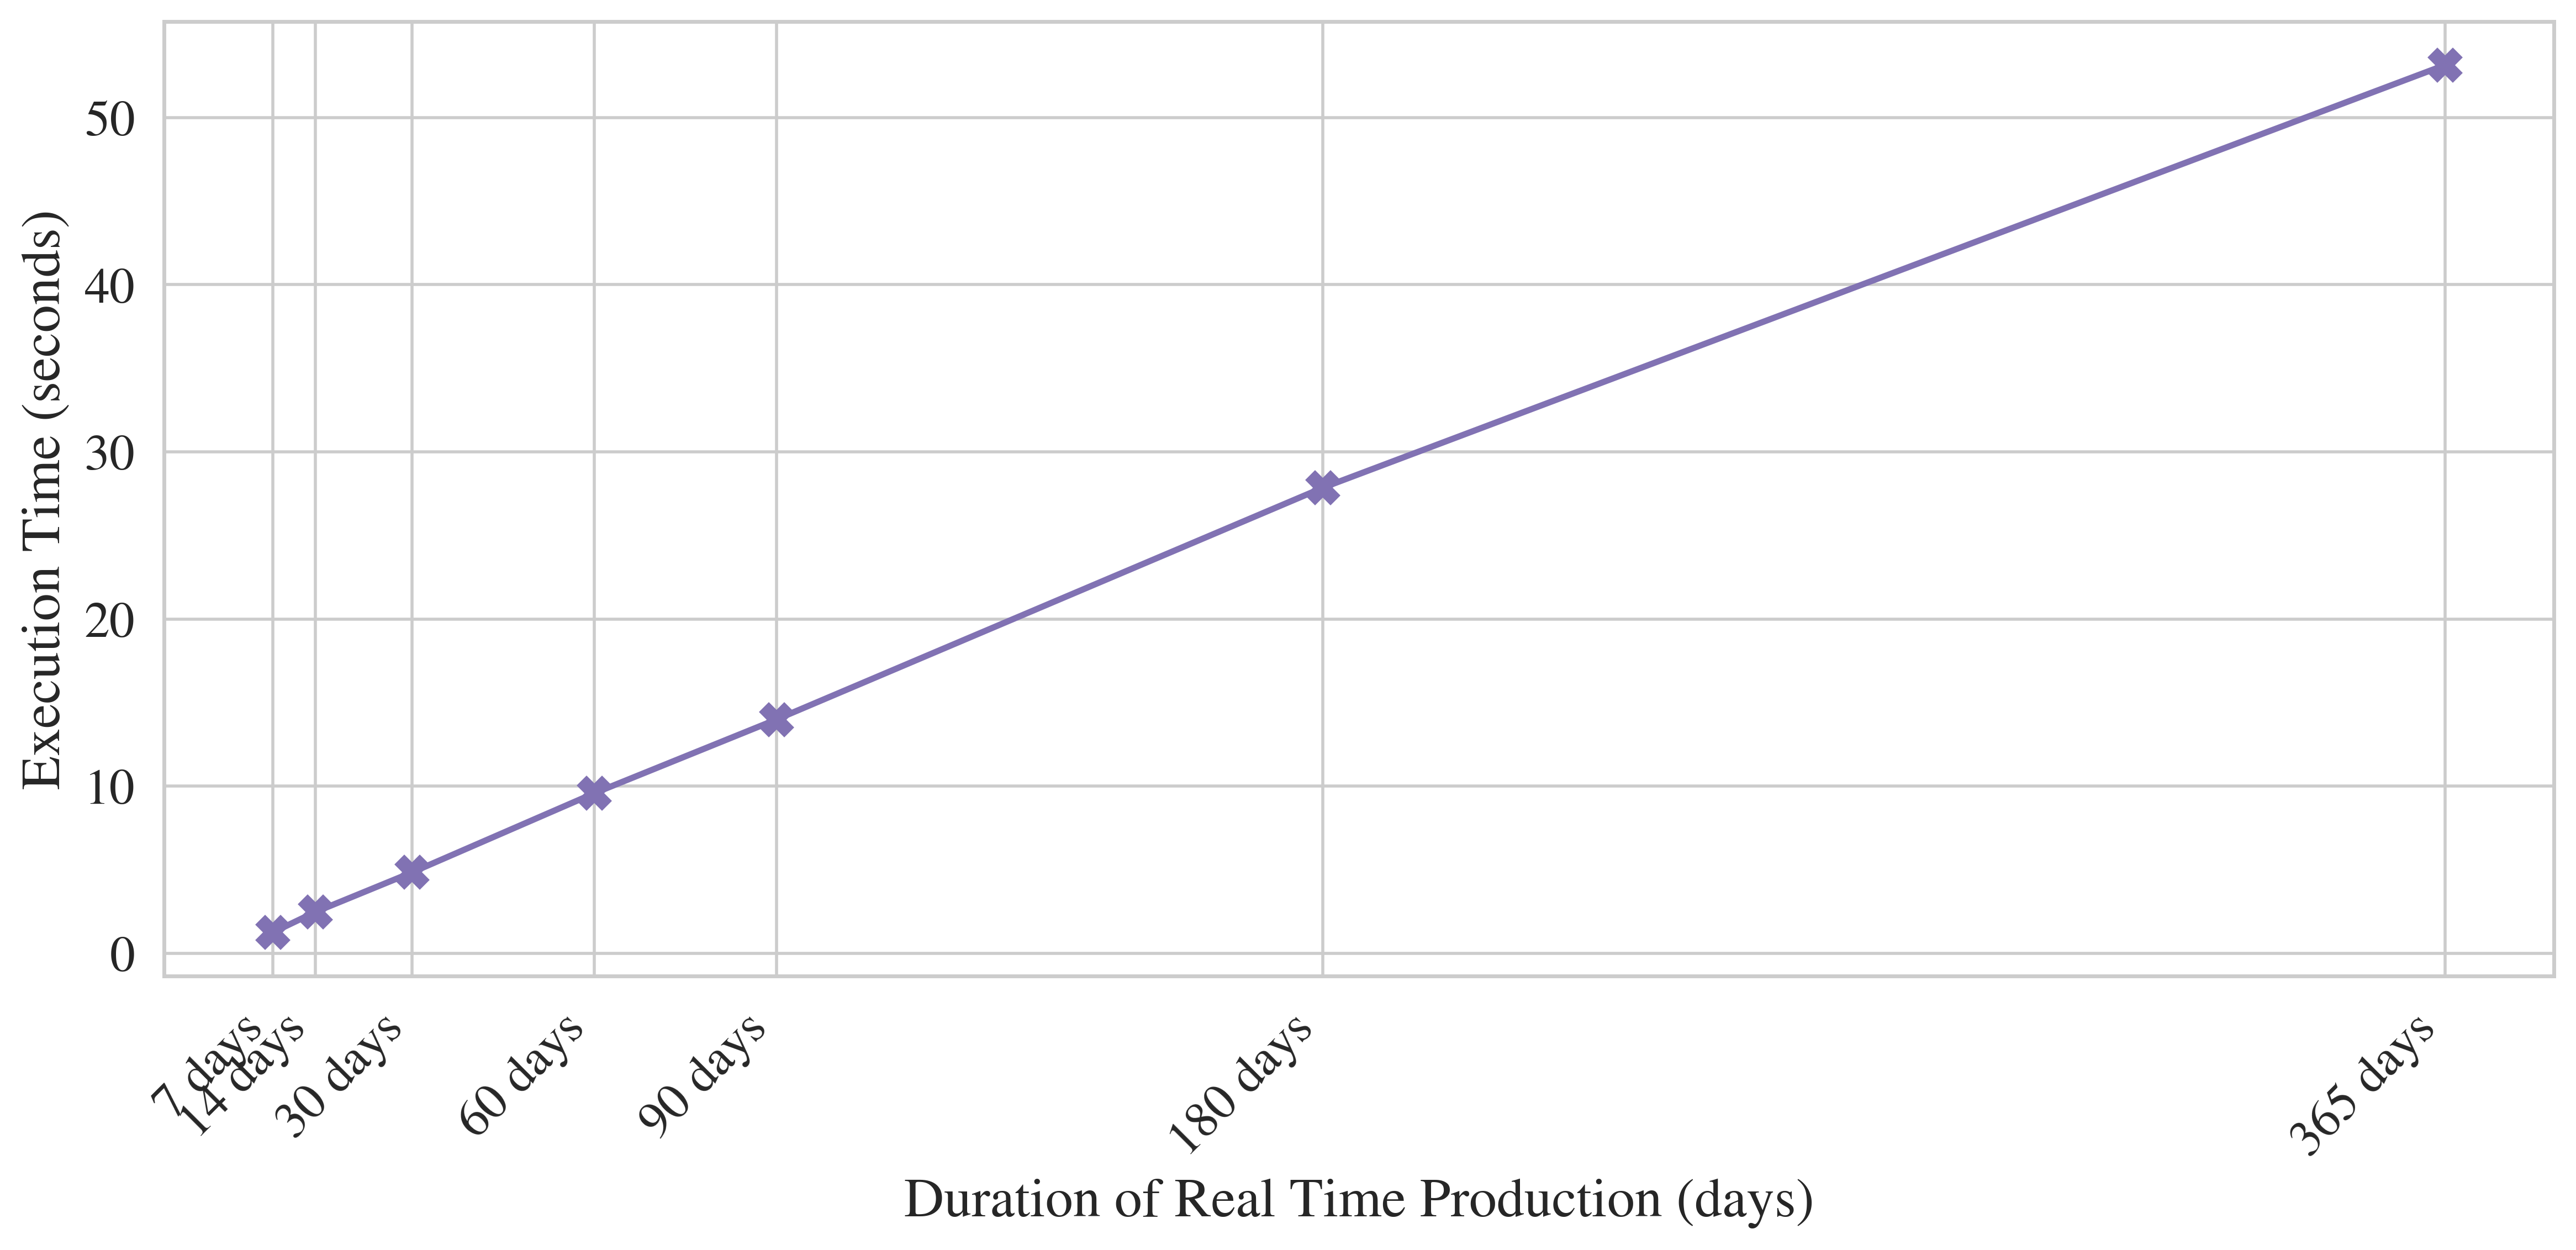

In [134]:
import matplotlib.pyplot as plt

# Simulation results
results = {
    "7 days": 1.25,
    "14 days": 2.47,
    "30 days": 4.85,
    "60 days": 9.58,
    "90 days": 13.99,
    "180 days": 27.85,
    "365 days": 53.15
}

# Extracting the time durations and execution times
durations = list(results.keys())
execution_times = list(results.values())

# Convert durations to numerical values (days)
days = [int(duration.split()[0]) for duration in durations]

# Plotting the results as a line plot
plt.figure(figsize=(12, 6), dpi=400)
plt.plot(days, execution_times, marker='X', linestyle='-', color='m', linewidth=2, markersize=10)
plt.xlabel('Duration of Real Time Production (days)')
plt.ylabel('Execution Time (seconds)')

plt.xticks(days, durations, rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.savefig('dynsimulator_speed.pdf') 
plt.show()


Mean: 4535.0976472326265
Standard Deviation: 28.2302970518023
95% Confidence Interval: (4533.345825023506, 4536.849469441747)
Shapiro-Wilk Normality Test p-value: 8.582893454726863e-37
One-Sample T-Test p-value: 2.2868791833345194e-55
Bootstrap 95% Confidence Interval: [4533.3863787  4536.90804746]


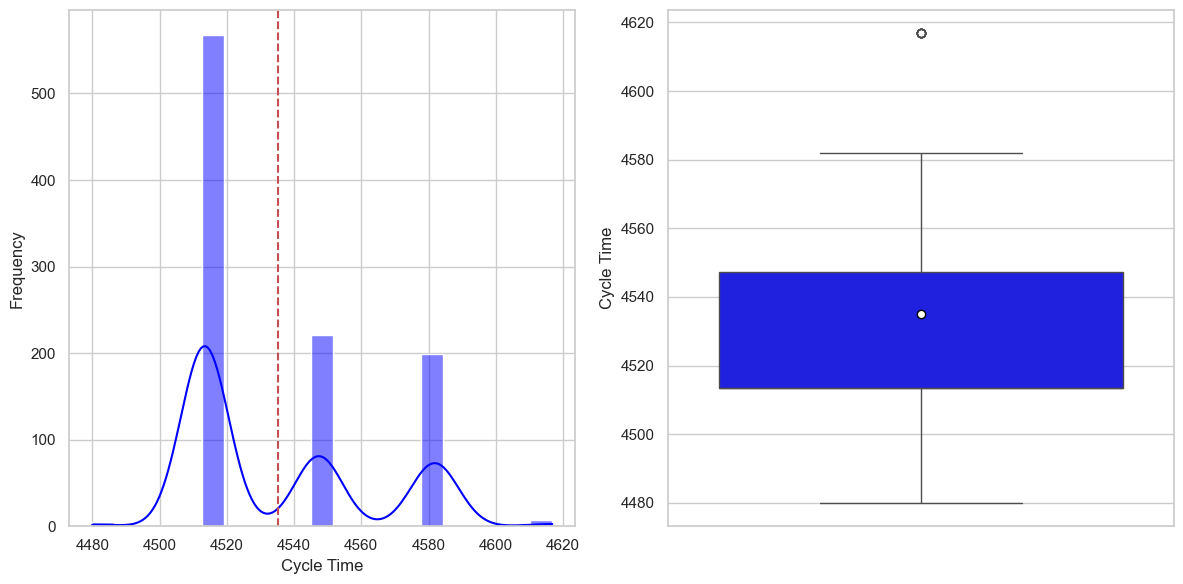

In [88]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



# Descriptive Statistics
mean_cycle_time = np.mean(cycle_time_values)
std_dev_cycle_time = np.std(cycle_time_values, ddof=1)
conf_int = stats.t.interval(0.95, len(cycle_time_values)-1, loc=mean_cycle_time, scale=stats.sem(cycle_time_values))

print(f"Mean: {mean_cycle_time}")
print(f"Standard Deviation: {std_dev_cycle_time}")
print(f"95% Confidence Interval: {conf_int}")

# Normality Test
shapiro_stat, shapiro_p_value = stats.shapiro(cycle_time_values)
print(f"Shapiro-Wilk Normality Test p-value: {shapiro_p_value}")

# One-Sample T-Test (against a hypothetical mean, e.g., 4500)
t_stat, ttest_p_value = stats.ttest_1samp(cycle_time_values, 4550)
print(f"One-Sample T-Test p-value: {ttest_p_value}")

# Bootstrap Method to validate the mean
bootstrap_means = []
n_bootstraps = 10000
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(cycle_time_values, size=len(cycle_time_values), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

bootstrap_means = np.array(bootstrap_means)
bootstrap_conf_int = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Bootstrap 95% Confidence Interval: {bootstrap_conf_int}")

plt.figure(figsize=(12, 6), dpi=400)

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(cycle_time_values, kde=True, color="blue")
plt.axvline(mean_cycle_time, color='r', linestyle='--')
plt.xlabel('Cycle Time')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=cycle_time_values, color='blue', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
sns.set(style="whitegrid")
plt.ylabel('Cycle Time')
sns.set_context("notebook", font_scale=1.5)
plt.tight_layout()

plt.savefig('ctdynamic_boxplot.pdf') 
plt.show()


In [114]:
from scipy.stats import shapiro

statistic, p_value = shapiro(cycle_time_values)

print(f"Chi-square Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value}")

Chi-square Test Statistic: 0.7413
P-value: 8.582893454726863e-37


Mean: 4535.0976472326265
Standard Deviation: 28.21617837272377
95% Confidence Interval: (4533.345825023506, 4536.849469441747)
Normality Test p-value: 4.926240687455412e-32
One-Sample T-Test p-value: 4.759240149838244e-205


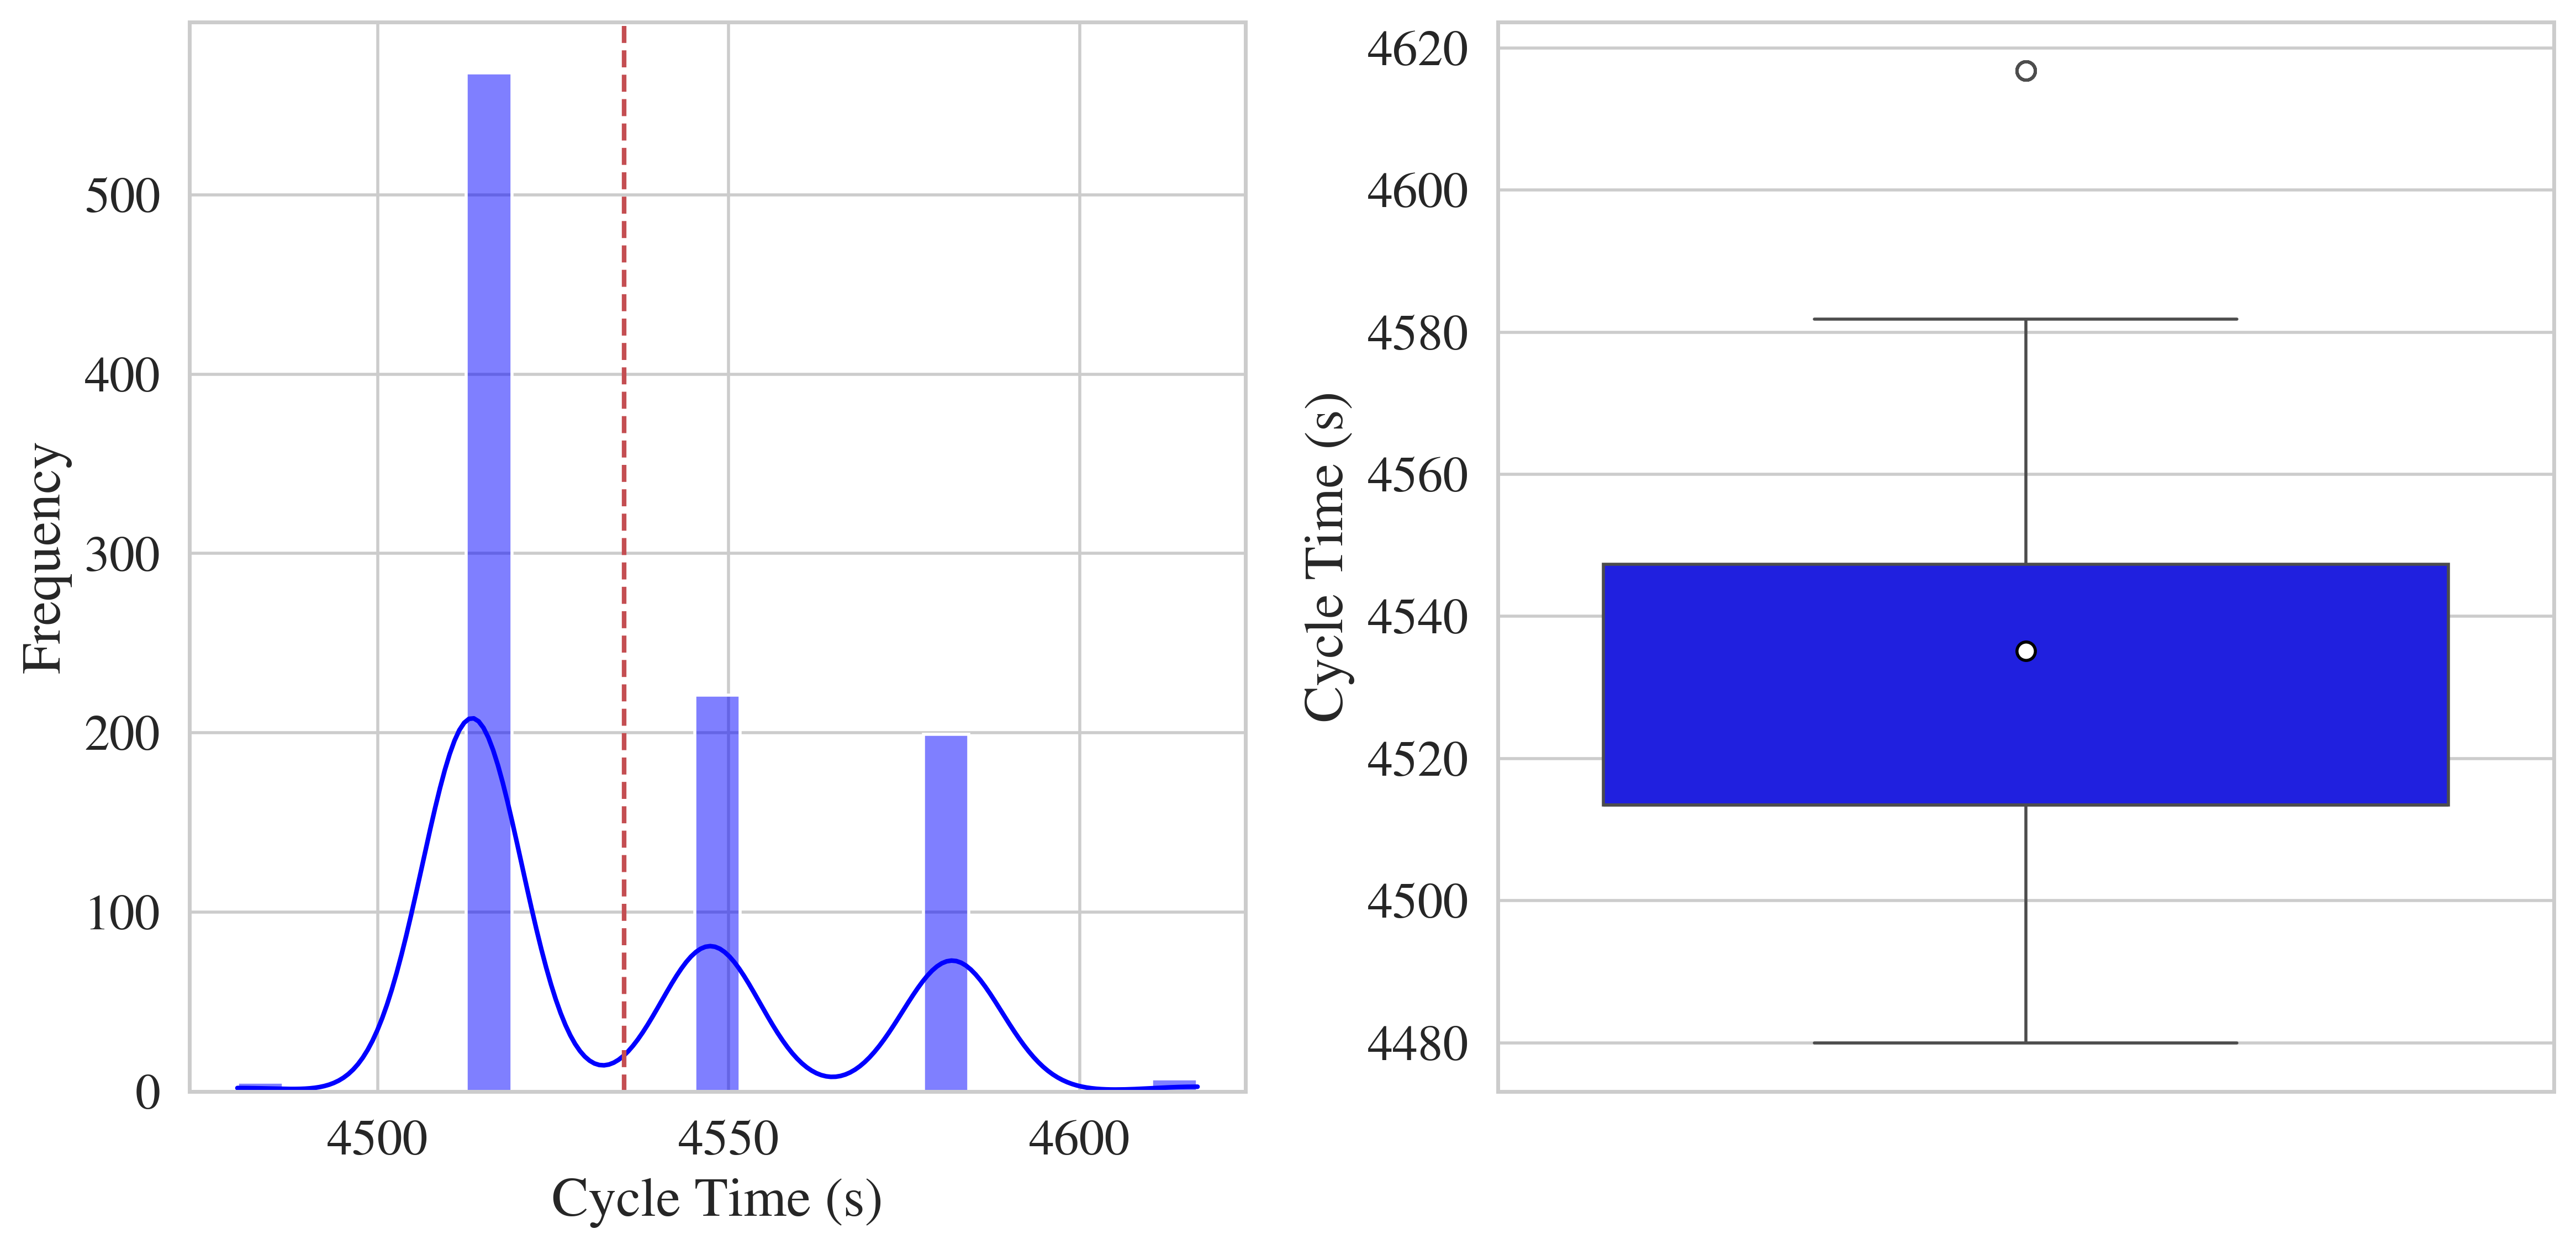

In [92]:
import scipy.stats as stats
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
sns.set_context("notebook", font_scale=1.5)
mean = np.mean(cycle_time_values)
std_dev = np.std(cycle_time_values)
conf_int = stats.t.interval(0.95, len(cycle_time_values)-1, loc=mean, scale=stats.sem(cycle_time_values))

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"95% Confidence Interval: {conf_int}")

# 2. Normality Test
k2, p_value = stats.normaltest(cycle_time_values)
print(f"Normality Test p-value: {p_value}")

# 3. One-Sample T-Test (against a hypothetical mean, e.g., 4500)
t_stat, p_value_ttest = stats.ttest_1samp(cycle_time_values, 4500)
print(f"One-Sample T-Test p-value: {p_value_ttest}")

# Plotting
plt.figure(figsize=(12, 6), dpi=400)

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(cycle_time_values, kde=True, color="blue")
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel('Cycle Time (s)')
plt.ylabel('Frequency')
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=cycle_time_values, color='blue', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
plt.ylabel('Cycle Time (s)')
plt.tight_layout()
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
sns.set_context("notebook", font_scale=1.5)
plt.savefig('ctdynamic_boxplot.pdf') 
plt.show()

In [69]:
from scipy.stats import ttest_1samp
expected_mean = 4550

t_statistic, p_value = ttest_1samp(cycle_time_values, expected_mean)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Results are statistically significant.")
else:
    print("Fail to reject the null hypothesis. Results are not statistically significant.")

T-Statistic: 0.10938165537028094
P-Value: 0.9129217503653904
Fail to reject the null hypothesis. Results are not statistically significant.


One function

In [21]:
def get_data(csv_file_path):
 
    data = {}
    with open(csv_file_path, newline='') as csvfile:
        csv_reader = csv.DictReader(csvfile)

        for row in csv_reader:
            row['Mean Idle Times'] = ast.literal_eval(row['Mean Idle Times'])
            row['Sum Idle Times'] = ast.literal_eval(row['Sum Idle Times'])
            row['Downtime'] = ast.literal_eval(row['Downtime'])
            row['Mean CT'] = ast.literal_eval(row['Mean CT'])

            data[row['Experiment']] = row

    return data

In [48]:
def analyze_it(csv_file_path):
    
    data = get_data(csv_file_path)

    
    machine_mean_idle_times = {}

    for experiment, row in data.items():
        for machine_num, idle_time in enumerate(row['Mean Idle Times'], start=1):
            if machine_num not in machine_mean_idle_times:
                machine_mean_idle_times[machine_num] = []
            machine_mean_idle_times[machine_num].append(idle_time)

    num_machines = len(machine_mean_idle_times)
    num_rows = (num_machines // 2) + (num_machines % 2)  

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8), sharex=True, sharey=True)
    fig.suptitle('Distribution of Mean Idle Time for Each Machine', y=1.02)

    axes = axes.flatten()

    for machine_num, ax in zip(sorted(machine_mean_idle_times.keys()), axes):
        mean_idle_times = machine_mean_idle_times[machine_num]
        ax.hist(mean_idle_times, bins=20, label=f'Machine {machine_num}', alpha=0.7)
        ax.set_title(f'Machine {machine_num}')
        ax.set_xlabel('Mean Idle Time')
        ax.set_ylabel('Frequency')
        ax.legend()

    if num_machines % 2 == 1:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

    mean_ct_values_per_machine = {}

    for experiment, row in data.items():
        for machine_num, _ in enumerate(row['Mean CT'], start=1): 
            machine_mean_ct_values = []
            
            for row in data.values():
                machine_mean_ct_values.append(row['Mean CT'][machine_num - 1])
            
            mean_ct_values_per_machine[f'Machine {machine_num}'] = machine_mean_ct_values
    
    descriptive_df = pd.DataFrame()

    for machine, values in mean_ct_values_per_machine.items():
        descriptive_df[machine] = values

    descriptive_stats = descriptive_df.describe().transpose()

    print("Descriptive Analysis of Mean CT per Machine:")
    print(descriptive_stats)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(mean_ct_values_per_machine.values(), vert=True, labels=mean_ct_values_per_machine.keys(), sym='.', showfliers=False)
    ax.set_title('Boxplot of Mean CT per Machine')
    ax.set_xlabel('Mean CT')
    ax.set_ylabel('Machine')
    plt.show()

    cycle_time_values = [float(row['Cycle Time']) for row in data.values()]

    cycle_time_df = pd.DataFrame({'Cycle Time': cycle_time_values})
    cycle_time_descriptive_stats = cycle_time_df.describe()

    q1 = np.percentile(cycle_time_values, 25)
    q3 = np.percentile(cycle_time_values, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [value for value in cycle_time_values if value < lower_bound or value > upper_bound]
    num_outliers = len(outliers)

    print("Descriptive Analysis of Cycle Time:")
    print(cycle_time_descriptive_stats)
    print(f"Number of Outliers: {num_outliers}")
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=cycle_time_values, showfliers=False)
    plt.xlabel('Cycle Time')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(cycle_time_values, kde=True)
    plt.title('Distribution of Cycle Time')
    plt.xlabel('Cycle Time')
    plt.ylabel('Frequency')
    plt.show()

    filtered_cycle_time_values = [value for value in cycle_time_values if value >= lower_bound and value <= upper_bound]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(cycle_time_values) + 1), cycle_time_values, marker='o', linestyle='-', color='b')
    plt.title('Dynamic Avg. Cycle Time of 1 Month per experiment')
    plt.xlabel('Run Index')
    plt.ylabel('Cycle Time')

    # Create a run order plot without outliers
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(filtered_cycle_time_values) + 1), filtered_cycle_time_values, marker='o', linestyle='-', color='g')
    plt.title('Dynamic Avg. Cycle Time of 1 Month per experiment - Without Outliers')
    plt.xlabel('Run Index')
    plt.ylabel('Cycle Time')

    plt.tight_layout()
    plt.show()
    

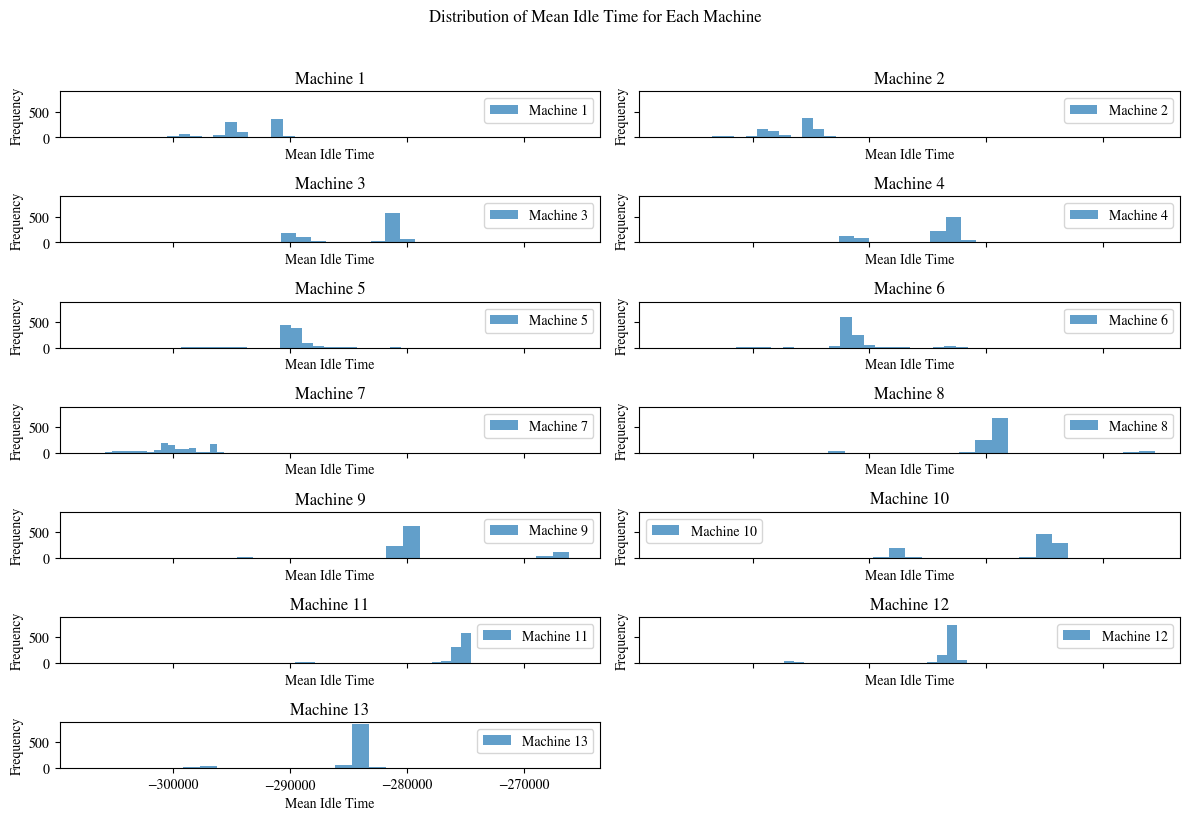

Descriptive Analysis of Mean CT per Machine:
             count          mean           std           min           25%  \
Machine 1   1000.0   8835.111297  7.420871e+01   8518.309859   8765.217391   
Machine 2   1000.0   8867.723822  6.429237e+01   8640.000000   8894.117647   
Machine 3   1000.0  17666.797861  2.181372e+02  17280.000000  17788.235294   
Machine 4   1000.0  17705.516150  1.936334e+02  17280.000000  17788.235294   
Machine 5   1000.0  17790.822674  9.406648e+01  17280.000000  17788.235294   
Machine 6   1000.0  17947.821176  2.472823e+02  17280.000000  17788.235294   
Machine 7   1000.0   4454.856530  4.017686e+01   4351.079137   4447.058824   
Machine 8   1000.0  26507.212648  4.564204e+02  26295.652174  26295.652174   
Machine 9   1000.0  26766.583399  5.843364e+02  26295.652174  26295.652174   
Machine 10  1000.0  27456.246640  2.006722e+02  26295.652174  27490.909091   
Machine 11  1000.0  27490.909091  1.091940e-11  27490.909091  27490.909091   
Machine 12  1000.0 

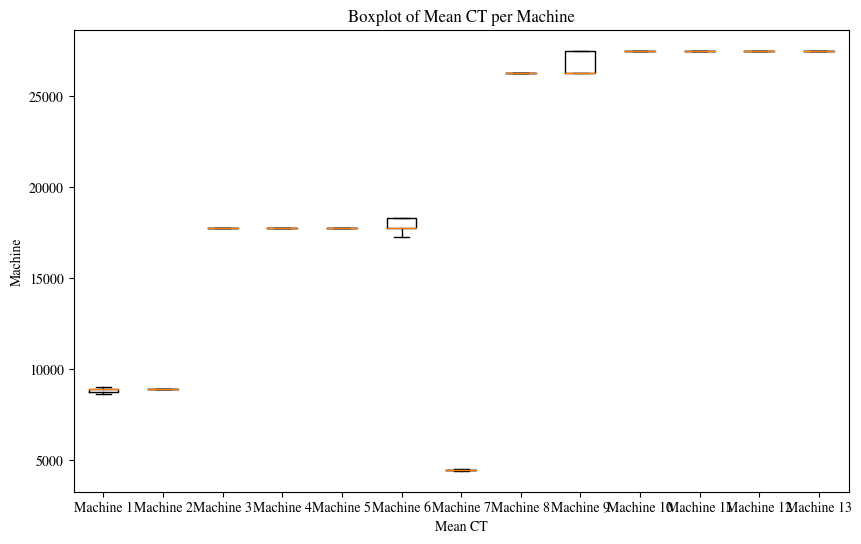

Descriptive Analysis of Cycle Time:
        Cycle Time
count  1000.000000
mean   4535.097647
std      28.230297
min    4480.000000
25%    4513.432836
50%    4513.432836
75%    4547.368421
max    4616.793893
Number of Outliers: 7


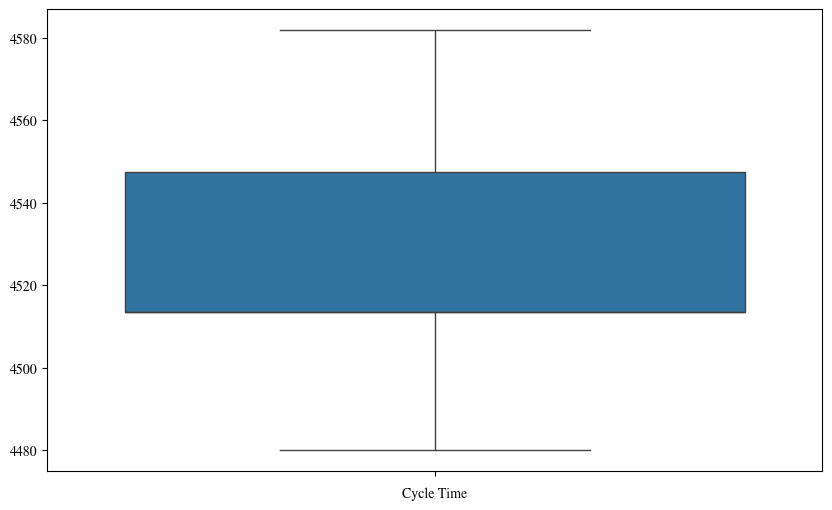

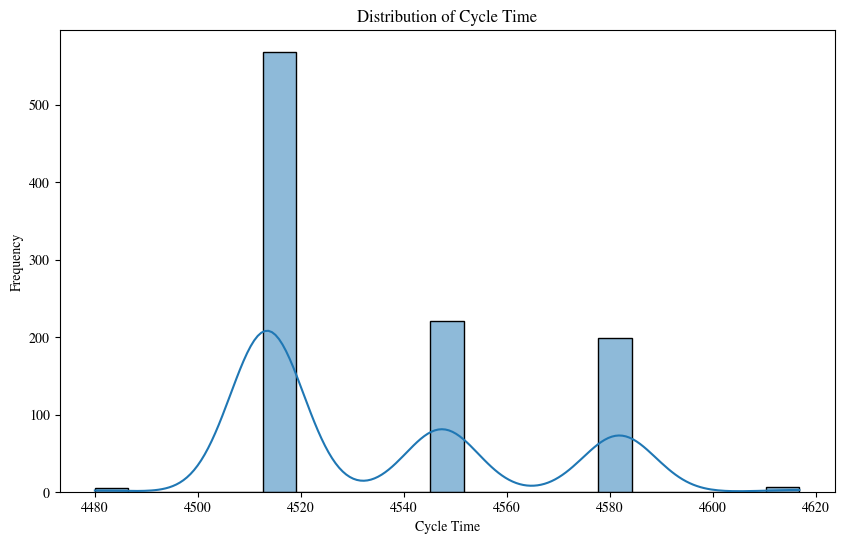

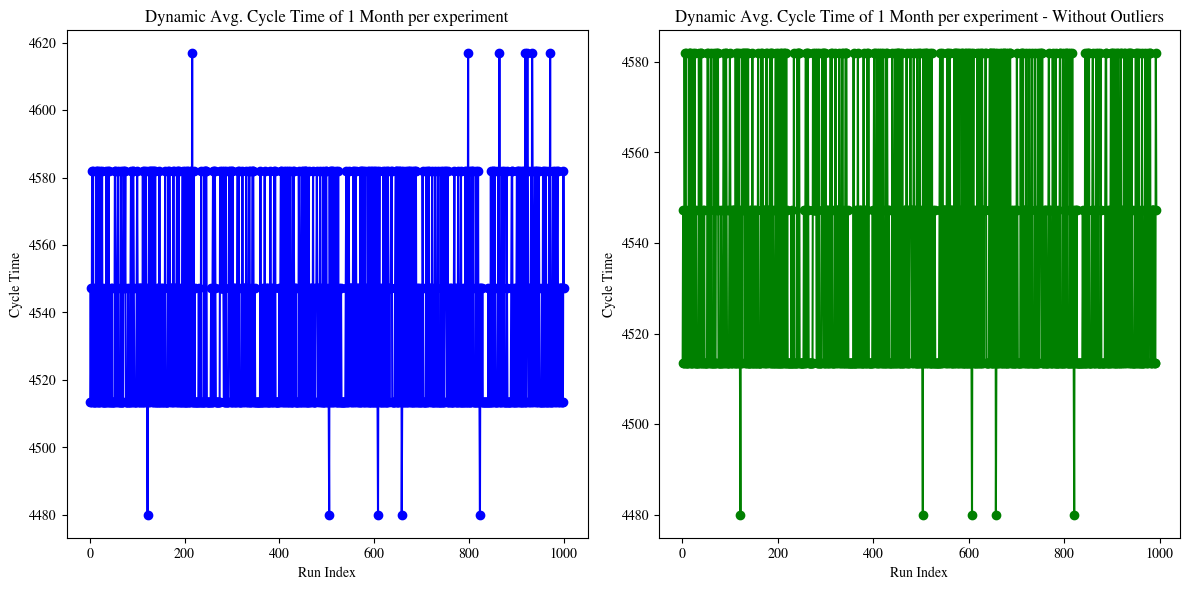

In [49]:
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#M1 + M11 => M2 => M3 => M4 => M5

analyze_it('results/results.csv')


Analysis of effect of Buffer size

In [153]:
csv_file_path = 'results/results_1.csv'

df = pd.read_csv(csv_file_path)
CT_per_experiment = df["Sum Idle Times"].apply(eval)

In [165]:
meanCT_per_experiment = []
buffer_sizes= []
for i in range(len(CT_per_experiment)):
    meanCT_per_experiment.append(np.sum(CT_per_experiment[i]))
    buffer_sizes.append(i*10+1)

inventory_cost = [50*i for i in buffer_sizes]

In [166]:
cost_per_experiment = [a_i + b_i for a_i, b_i in zip(meanCT_per_experiment, inventory_cost)]

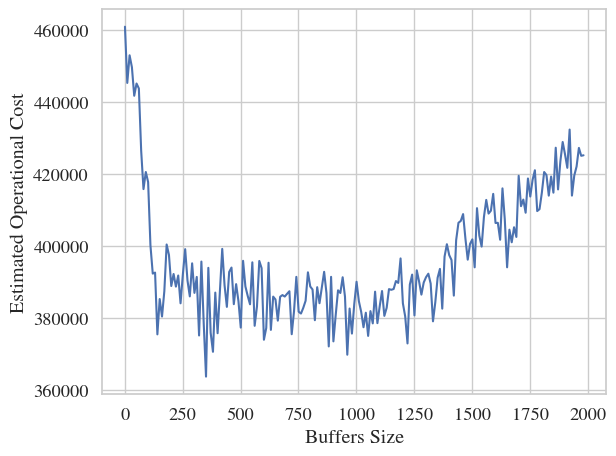

In [177]:

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
sns.set_context("notebook", font_scale=1.2)
fig, ax1 = plt.subplots()

ax1.set_xlabel("Buffers Size")
ax1.set_ylabel('Estimated Operational Cost')
ax1.plot(buffer_sizes, cost_per_experiment)
ax1.tick_params(axis='y')
plt.tight_layout()

plt.savefig('costVsbuffersize.pdf')

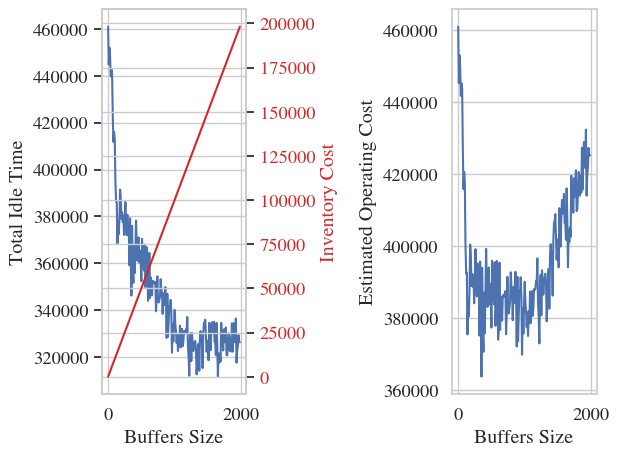

In [175]:
fig, ax = plt.subplots(1, 2)

ax[0].set_xlabel("Buffers Size")
ax[0].set_ylabel('Total Idle Time')
ax[0].plot(buffer_sizes, meanCT_per_experiment)
ax[0].tick_params(axis='y')

ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Inventory Cost', color=color)  # we already handled the x-label with ax1
ax2.plot(buffer_sizes, [100*i for i in buffer_sizes], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax[1].set_xlabel("Buffers Size")
ax[1].set_ylabel('Estimated Operating Cost')
ax[1].plot(buffer_sizes, cost_per_experiment)
ax[1].tick_params(axis='y')
plt.tight_layout()

### Regression linéaire par morceaux => à

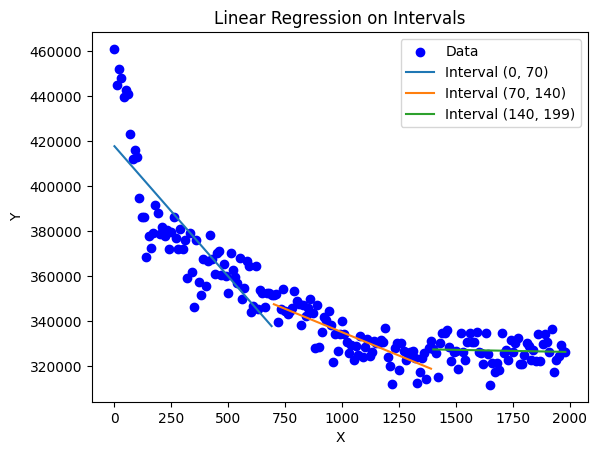

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# buffer_sizes, 
x = np.array(buffer_sizes)
y = np.array(meanCT_per_experiment)

# Define intervals (you can adjust this based on your data)
intervals = [(0, 70), (70, 140), (140, len(x))]

# Perform linear regression on each interval and plot
plt.scatter(x, y, color='blue', label='Data')

for interval in intervals:
    start, end = interval
    x_interval = x[start:end].reshape(-1, 1)
    y_interval = y[start:end]

    model = LinearRegression()
    model.fit(x_interval, y_interval)

    x_pred = np.linspace(x[start], x[end - 1], 100).reshape(-1, 1)
    y_pred = model.predict(x_pred)

    plt.plot(x_pred, y_pred, label=f'Interval {interval}')

plt.title('Linear Regression on Intervals')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Postorior Optim

In [6]:
df

,Machine ID,Buffer Tracks
0,M1,"[0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, ..."
1,M2,"[0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, ..."
2,M3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,M4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,M5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
794,M3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
795,M4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
796,M5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
797,M6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Max Value =  0.02
Max Value =  0.01
Max Value =  3.74
Max Value =  3.69
Max Value =  3.58
Max Value =  3.6
Max Value =  2.19


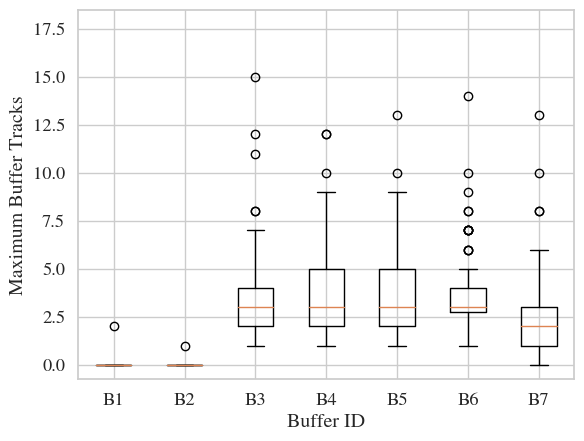

In [238]:
#csv_file_path = "./results/postoriorOptim/NOrobotNObreakdown.csv"
csv_file_path = "results/forecast_data.csv"
df = pd.read_csv(csv_file_path)

m_keys = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']
b_keys = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
def max_in_list(lst):
    return max(eval(lst))

max_values_per_machine = []

for machine_id in m_keys:
    max_values_per_machine.append(df[df["Machine ID"] == machine_id]["Buffer Tracks"].apply(max_in_list))
    print("Max Value = ", np.mean(max_values_per_machine[-1]))

plt.boxplot(max_values_per_machine, labels=b_keys)
plt.xlabel('Buffer ID')
plt.ylabel('Maximum Buffer Tracks')
plt.ylim(-0.75, 18.5)
plt.savefig('buffertracks-withoutstochastic.pdf')

plt.show()

Max Value =  75.5
Max Value =  100.0
Max Value =  19.0
Max Value =  18.0
Max Value =  19.0
Max Value =  19.0


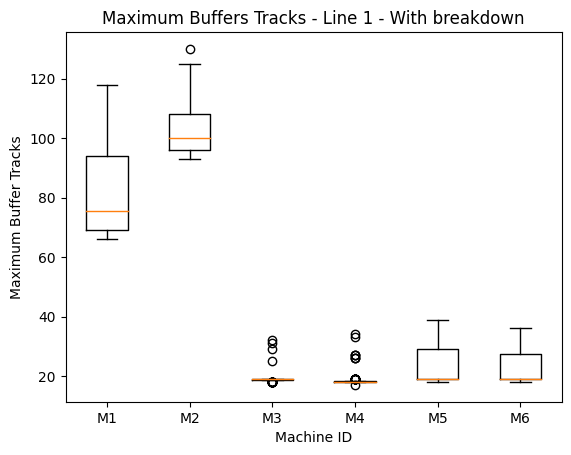

In [23]:
#csv_file_path = "./results/postoriorOptim/NOrobotOKBreakdown.csv"
csv_file_path = "results/forecast_data.csv"
df = pd.read_csv(csv_file_path)

import matplotlib.pyplot as plt

m_keys = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']

def max_in_list(lst):
    return max(eval(lst))

max_values_per_machine = []

for machine_id in m_keys:
    max_values_per_machine.append(df[df["Machine ID"] == machine_id]["Buffer Tracks"].apply(max_in_list))
    print("Max Value = ", np.median(max_values_per_machine[-1]))

plt.boxplot(max_values_per_machine, labels=m_keys)
plt.xlabel('Machine ID')
plt.ylabel('Maximum Buffer Tracks')
plt.title('Maximum Buffers Tracks - Line 1 - With breakdown')
plt.show()

ALl machines have same Operating time = 100 s 

C:\Users\elhoudan\AppData\Local\Temp\ipykernel_17492\872154178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Machine ID"]=="M1"]["Buffer Tracks"] = df[df["Machine ID"]=="M1"]["Buffer Tracks"].apply(eval)


Max Value =  45.0
Max Value =  59.0
Max Value =  43.0
Max Value =  37.0
Max Value =  37.0
Max Value =  57.0


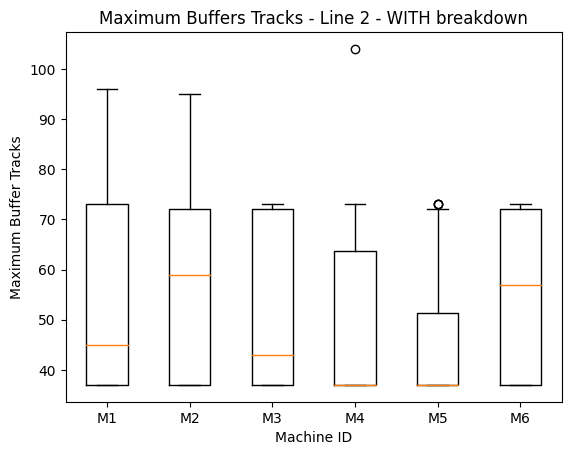

In [14]:
import pandas as pd
csv_file_path = "./results/postoriorOptim/NoRobot_OKBreakdown_allsamect.csv"

df = pd.read_csv(csv_file_path)
df[df["Machine ID"]=="M1"]["Buffer Tracks"] = df[df["Machine ID"]=="M1"]["Buffer Tracks"].apply(eval)

import matplotlib.pyplot as plt

m_keys = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']

def max_in_list(lst):
    return max(eval(lst))

max_values_per_machine = []

for machine_id in m_keys:
    max_values_per_machine.append(df[df["Machine ID"] == machine_id]["Buffer Tracks"].apply(max_in_list))
    print("Max Value = ", np.median(max_values_per_machine[-1]))

plt.boxplot(max_values_per_machine, labels=m_keys)
plt.xlabel('Machine ID')
plt.ylabel('Maximum Buffer Tracks')
plt.title('Maximum Buffers Tracks - Line 2 - WITH breakdown')
plt.show()

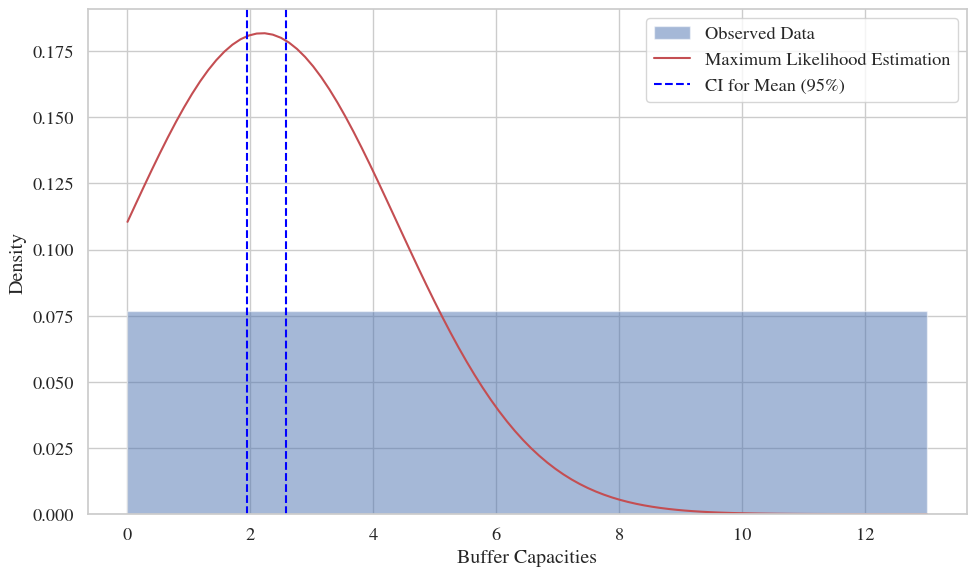

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Observed data
data = np.array(max_values_per_machine[6])

def neg_log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

initial_guess = [0, 1]

# Minimize negative log-likelihood (Maximize likelihood)
result = minimize(neg_log_likelihood, initial_guess, args=(data,), method='Nelder-Mead')

# Maximum likelihood estimates
mu_mle, sigma_mle = result.x

# Bootstrap resampling
bootstrap_samples = np.random.choice(data, size=(len(data), 30), replace=True)
bootstrap_means = np.mean(bootstrap_samples, axis=0)
bootstrap_stdevs = np.std(bootstrap_samples, axis=0)

# Compute confidence intervals (95%)
ci_mean = np.percentile(bootstrap_means, [2.5, 97.5])
ci_stdev = np.percentile(bootstrap_stdevs, [2.5, 97.5])

plt.figure(figsize=(10, 6))
plt.hist(data, bins=1, density=True, alpha=0.5, label='Observed Data')

# Plot fitted normal distribution based on MLE
x = np.linspace(min(data), max(data), 100)
fitted_distribution = norm.pdf(x, mu_mle, sigma_mle)
plt.plot(x, fitted_distribution, 'r-', label='Maximum Likelihood Estimation')

# Confidence intervals
plt.axvline(ci_mean[0], color='blue', linestyle='--', label='CI for Mean (95%)')
plt.axvline(ci_mean[1], color='blue', linestyle='--')
# plt.axvline(ci_stdev[0], color='green', linestyle='--', label='CI for Stdev (95%)')
# plt.axvline(ci_stdev[1], color='green', linestyle='--')

plt.xlabel('Buffer Capacities')
plt.ylabel('Density')
#plt.title('Maximum Likelihood Estimation and Bootstrap Confidence Intervals')
plt.legend()
plt.tight_layout()

plt.savefig('MLE-confidenceintervals.pdf')

plt.show()
# Bayesian Hypothesis + Frequentist 
# A Bayesian Approach to Optimize Buffer Stock Sizes using A Stochastic Manufacturing System Simulator

All machine have same operating time with No breakdown

C:\Users\elhoudan\AppData\Local\Temp\ipykernel_17492\3595054710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Machine ID"]=="M1"]["Buffer Tracks"] = df[df["Machine ID"]=="M1"]["Buffer Tracks"].apply(eval)


Max Value =  1.0
Max Value =  1.0
Max Value =  1.0
Max Value =  1.0
Max Value =  1.0
Max Value =  1.0


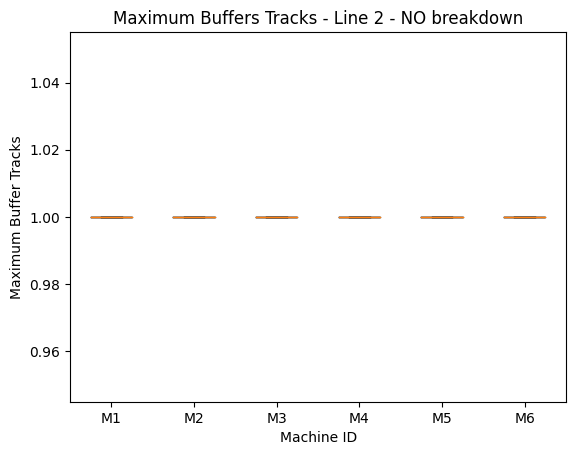

In [12]:
import pandas as pd
csv_file_path = "./results/postoriorOptim/Norobot_nobreakdown_allsamect.csv"

df = pd.read_csv(csv_file_path)
df[df["Machine ID"]=="M1"]["Buffer Tracks"] = df[df["Machine ID"]=="M1"]["Buffer Tracks"].apply(eval)

import matplotlib.pyplot as plt

m_keys = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']

def max_in_list(lst):
    return max(eval(lst))

max_values_per_machine = []

for machine_id in m_keys:
    max_values_per_machine.append(df[df["Machine ID"] == machine_id]["Buffer Tracks"].apply(max_in_list))
    print("Max Value = ", np.median(max_values_per_machine[-1]))

plt.boxplot(max_values_per_machine, labels=m_keys)
plt.xlabel('Machine ID')
plt.ylabel('Maximum Buffer Tracks')
plt.title('Maximum Buffers Tracks - Line 2 - NO breakdown')
plt.show()

### Prior Optim

In [ ]:
import numpy as np

def function_to_optimize(buffer_capacities):
    """
    Define the function that you want to optimize.
    """
    # Example function: sum of squares
    return np.sum(buffer_capacities**2)

def finite_perturbation_analysis(function, buffer_capacities, perturbation_value=1):
    """
    Perform Finite Perturbation Analysis to estimate the gradient of the function with respect to buffer capacities.
    """
    gradient_estimate = np.zeros_like(buffer_capacities)

    for i in range(len(buffer_capacities)):

        buffer_capacities_plus = buffer_capacities.copy()
        buffer_capacities_plus[i] += perturbation_value
        buffer_capacities_minus = buffer_capacities.copy()
        buffer_capacities_minus[i] -= perturbation_value

        function_plus = function(buffer_capacities_plus)
        function_minus = function(buffer_capacities_minus)

        gradient_estimate[i] = (function_plus - function_minus) / (2 * perturbation_value)

    return gradient_estimate

# Example usage:
initial_buffer_capacities = np.array([1.0, 2.0, 3.0])
gradient_estimate = finite_perturbation_analysis(function_to_optimize, initial_buffer_capacities)
print("Gradient Estimate:", gradient_estimate)


In [178]:
csv_file_path = 'results/forcast_data.csv'

df = pd.read_csv(csv_file_path)

In [36]:
test = [301315.44175234373, 276979.5223183341, 245610.30870835658, 244397.13809263034, 243441.0734943373, 243192.10827213112, 243122.60467739438, 243090.98536212707, 243291.4448166311, 243193.95452908726, 243160.31996882448, 243163.35092033158, 243149.86950042934, 243186.76052027527, 243134.90690386712, 243162.83950508552, 243093.1818622421, 243182.88093599532, 243191.13354073232, 243241.29064514302, 243234.80935076767, 243254.96366482813, 243202.5523578417, 243237.4623174158, 243214.04283274518, 243151.69665368926, 243152.01127814015, 243142.67447443915, 243519.93322613247, 243160.5999468624, 243194.98597396983, 243262.13107071028, 243093.1431501593, 243134.17946108122, 243264.84291608335, 243218.64481244973, 243116.84311031262, 243238.59543011646, 243305.60216305568, 243501.9019472587, 243141.59436943513, 243188.7951997393, 243188.18925681963, 243343.7265639476, 243956.44254059665, 243145.58490062348, 243178.80889911336, 243184.90486365207, 243235.58042932628, 243165.9652758649, 243243.12767378506, 243181.44690653958, 243174.56551649215, 243149.5717308722, 243980.44012624293, 243134.5560743194, 243191.85362697302, 243161.81074955894, 243300.64885206168, 243232.60298576392, 243239.68176412623, 243202.42722908297, 243170.22823112272, 243161.29517580383, 243217.21032211144, 243090.45454069678, 243102.6088716103, 243154.61616538014, 243202.03867623923, 243198.6709554909, 243221.93655111402, 243195.0202063541, 243302.09027002082, 243265.34339546575, 243193.23363470013, 243297.76749752983, 243217.52890084503, 243190.58393709132, 243161.8084247787, 243161.0211112795, 243164.364220356, 243527.09235282545, 243214.40312500272, 243161.85635114927, 243246.92273959794, 243117.09337333235, 243148.64214831294, 243232.70427058722, 243160.23495420377, 243154.90164184273, 243140.5043633271, 243195.677069698, 243321.93106336237, 243202.506512317, 243583.14411148572, 243206.01083943393, 243271.2297910782, 243182.88288211176, 243176.06645835473, 243152.10961203295]
test2 = [301241.7454950913, 299431.86534626025, 296472.02119183063, 292077.30092344264, 287420.45171296067, 282082.72397465573, 277223.67105288047, 271975.375565677, 267096.8415101902, 261304.14583119287, 256126.0587962788, 251810.13659808465, 250086.71526328404, 249663.40199469437, 248662.29543957097, 247798.3737960033, 247679.38121142366, 247122.50181796926, 246545.7203275779, 246483.19152756152, 246010.49113697407, 245405.60105300703, 244932.93713339456, 244853.1861528317, 244675.72332722068, 244521.15971224336, 244428.03110468714, 244304.63754228308, 244241.4784638504, 244091.62688279574, 243983.46481986615, 243707.28517554473, 243767.5289053366, 244448.92758205906, 243689.43833603972, 243539.38909381191, 243545.16629967766, 243434.37201135393, 243390.38046278805, 243396.2675607311, 243375.7979023494, 243346.69268733423, 243327.39152375146, 243347.0784926186, 243307.6170936281, 243278.70199827442, 243387.91743961422, 243295.48975988125, 243240.3819145058, 243263.64911122594, 243272.81607623753, 243282.48924618063, 243230.33066273577, 243236.27152660582, 243325.8254744474, 243224.49831736687, 243195.81861902116, 243171.43130440934, 243968.2915141488, 243174.2241093689, 243259.8814389963, 243277.4471896901, 243287.86008491972, 243134.87864518538, 243168.76359314704, 243117.4543966063, 243141.27452945538, 243162.68552012264, 243248.97446191285, 243168.43087714666, 243151.42470604487, 243144.17200695252, 243098.71610906444, 243091.92978008985, 243109.25810343816, 243131.77099404734, 243094.80954333133, 243900.83623499074, 243149.445974875, 243109.54021067655, 243120.69539287768, 243119.21641417508, 243121.32110271265, 243163.20377586124, 243211.3676316322, 243128.49996185442, 243129.7839478514, 243218.81978348922, 243127.86540729433, 243092.00119121122, 243134.83909783533, 243109.47034499113, 243165.47088842557, 243122.39931388604, 243223.74145302628, 243121.6064922938, 243116.96424363222, 243113.99468737913, 243513.80070942384, 243150.9798990847]
test3 = [301263.24480499915, 301251.86576275143, 301241.8890521069, 301315.5866120652, 300875.028069079, 300848.13754356524, 300113.97424012446, 300146.37494378735, 300131.16142442427, 299431.30394098983, 299439.9554028885, 298722.09500160866, 299028.6794912549, 298007.90715009935, 298007.3422074417, 297481.6274472031, 297137.46796013083, 296471.56446229544, 296453.34269445523, 296059.2544852599, 295752.1339978088, 295069.025229723, 294652.46973450866, 294626.62198714324, 293636.0771012337, 293227.79426312074, 293215.1614005547, 292229.85084030405, 291468.7592698502, 290643.6751317521, 290665.0015922695, 290228.8104292349, 289263.4094389482, 289243.2705229087, 288832.0007879201, 287863.10262421146, 287411.5523534426, 287402.62968896586, 286458.4967191013, 285967.2206859991, 285994.50537927635, 284882.36278832925, 284446.78836810216, 284446.893660816, 283481.9943447867, 283009.13346680143, 282079.4877242023, 282093.8503467961, 281586.5764992805, 280684.58829895, 280639.312010045, 280170.7964034894, 279256.817204044, 278640.330944618, 278633.66282433644, 277715.5677898814, 277210.12166168843, 277219.7501525831, 276288.78100210027, 275812.32194749574, 275811.68633657123, 274905.61052158405, 274396.5155566255, 273505.15519240947, 273369.5093540923, 272868.2187225842, 271967.8532436909, 271924.35762472777, 271441.4970880351, 270555.4966502267, 270553.27741846896, 270023.13509566477, 269148.3136240342, 268604.46529766574, 268615.47630922036, 267602.21329705906, 267102.42927023495, 267096.84786342585, 266202.6851597021, 265671.62773171806, 264809.07214650547, 264793.82671461866, 264246.18517248076, 263389.1941028981, 263405.9834628969, 262727.2277735467, 261857.71347911132, 261883.88944766248, 261342.17603985925, 260460.09548289556, 259926.17043750445, 259926.88819198095, 259053.42165551384, 258507.28181607986, 258386.0164582096, 257535.00133206905, 256995.7493808644, 256205.61604532797, 256155.69828542904, 255578.36189041997]

Text(0.5, 1.0, 'Convergence Curve per Learning Rate - No Robot No Breakdown')

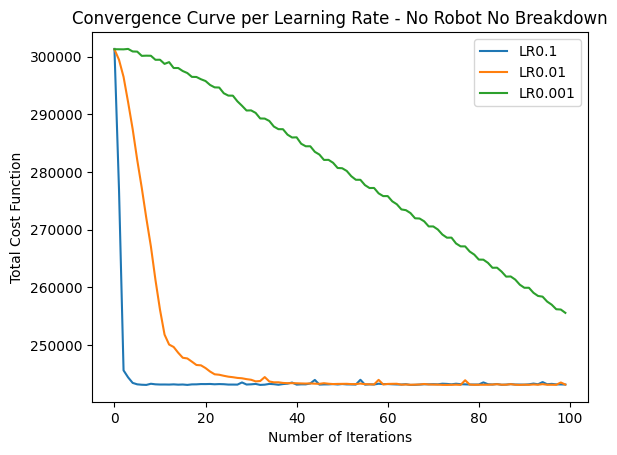

In [37]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Number of Iterations")
ax1.set_ylabel('Total Cost Function')

ax1.plot(test, label="LR0.1")
ax1.plot(test2, label="LR0.01")
ax1.plot(test3, label="LR0.001")
ax1.tick_params(axis='y')
ax1.legend(["LR0.1", "LR0.01", "LR0.001"])
ax1.set_title('Convergence Curve per Learning Rate - No Robot No Breakdown')


In [89]:
test4 = [266177.5136786972, 252806.55772693903, 198328.28463126297, 220757.0099774993, 249191.04544045017, 229037.0707517061, 211766.57837049742, 251932.80471179518, 219146.00266690957, 282914.1752979719, 291885.31039752526, 266310.3482773425, 245959.32824944038, 291411.0080034021, 260435.60490094492, 288739.0883449302, 223450.85896437554, 211122.34310113068, 222630.12803505544, 241571.67464403965, 221229.24808578222, 235428.99238732553, 240893.47905828082, 248415.13281711092, 231806.7948460188, 238605.22400928126, 211121.6885646501, 227811.91150832205, 237154.49651666966, 203201.79279348368, 234304.47469023167, 233275.31087023887, 228627.834456234, 220063.4991455906, 240399.96387566807, 234352.92282302224, 237552.1191083568, 216886.08945560138, 240878.625487804, 227249.85937028186, 224786.75826958066, 241361.09006312833, 248602.9633439679, 232819.9859673374, 224467.5172203473, 248172.12330220058, 247908.39286321355, 228385.76607053855, 221565.5136649303, 244100.01452598575, 243160.9704659181, 237560.1828681075, 216388.01394521634, 236962.79386480898, 247102.28166615847, 237364.846327339, 261997.78817408544, 239037.2197343997, 234772.71794404037, 253474.91517882157, 227056.7709157649, 224074.53822006547, 241990.11770657176, 253478.0745525342, 243763.20774354145, 256022.43606418493, 239499.9180311502, 238562.0498819512, 241565.72681777138, 231000.2589954428, 230668.94471662608, 242777.6018937694, 237772.68080337872, 246249.97110161875, 222888.97578983684, 245144.96646020556, 284229.4919586882, 276726.8911458269, 239907.4399626745, 267240.6578637027, 269191.56219347956, 258161.19204350916, 226319.3954461553, 247517.0323610042, 241511.1949647737, 263647.65249302104, 243886.17117322705, 243864.61771571246, 281690.34789477795, 279546.25668894534, 272702.69186259765, 281865.7144263865, 289613.82351993775, 278302.28601979715, 266665.9498768743, 286053.73503210075, 269697.59006288566, 297957.9098010904, 283542.16859443183, 273360.45262891415]
test5 = [281375.13951526425, 278113.84437988175, 276071.6779970041, 275917.6610292937, 269758.63255267503, 276992.7176802082, 259031.97056436908, 278614.9915021748, 273045.4981095418, 258123.34804897592, 256445.14349438893, 249182.47069392639, 251510.25457288208, 235024.18791833534, 226475.28988396784, 228210.3338846145, 242913.20508396364, 252632.3153254574, 230390.5421424739, 227314.19541113402, 201875.43556046183, 232714.7968610219, 217468.5980018441, 233922.71984118322, 240681.16300363326, 226115.8927018484, 230209.24995580886, 235100.28698561544, 201575.4556340227, 234993.05284726087, 225806.470053627, 198167.28384360412, 232197.52161951447, 212630.81878199594, 201697.1306025763, 227656.00475599896, 237523.77743597134, 207574.93155411808, 236698.71494930156, 224378.1729631905, 226657.4911400778, 229942.604091793, 243671.40053276464, 241061.19269526983, 210117.18091757485, 224727.5210298922, 251285.05935143068, 250831.59556114645, 248773.80212532292, 234459.08558584537, 228753.06659773193, 228566.28232566215, 211646.42249416633, 217551.87041186093, 217380.0327305196, 228471.65125431117, 230786.648810048, 237163.98449794907, 235896.22418716567, 234829.42461883638, 243093.99992932176, 244990.25766027358, 215872.52637342553, 226683.89127735933, 212678.19507777746, 213179.6577981937, 216262.75676525515, 224208.48023223304, 224068.40704158397, 189694.55179699807, 235048.20861992968, 230710.02814131987, 231186.87370916604, 231754.52554378897, 211328.4166905588, 235732.8647374099, 234378.71286574844, 234901.61202485324, 229817.9767362276, 203419.9119528805, 226592.60803312014, 225580.87857133336, 227141.90477492817, 235028.7441022637, 235957.2898125652, 227118.01211493427, 244201.1206121141, 238893.67809163444, 230239.775970598, 196568.49559088857, 197223.54329780137, 221854.28359446878, 225649.64078886496, 217696.79059045907, 233556.88644387634, 196394.88819356274, 227817.00255748452, 213134.92607966476, 229248.68927024308, 176327.36173609135]
test6 = [131419.83018967923, 155682.3127817544, 192715.54324725855, 136184.08380859782, 104730.69812736691, 212534.57027861034, 132414.54906759263, 176055.50975444022, 235477.80811842537, 121370.71568939245, 100266.5996296282, 127813.46565138067, 151774.7286995187, 101601.86529458339, 131519.22315165057, 152138.05741427507, 166054.85857986964, 124592.4946478892, 207918.39436005763, 98265.27667813307, 111020.91502650661, 144763.2579407878, 169213.91279632598, 117551.8850951342, 156885.7292278694, 160765.7718311482, 138265.9026432733, 99193.56505185743, 98304.8821656089, 99787.77151312848, 122590.67934373033, 136753.79546801484, 201555.49388217, 127037.35996171726, 140033.63611717438, 140982.63500476535, 159554.35996301926, 90211.68792416407, 84861.32152972397, 137825.03467786632, 153729.47013083083, 134420.95580990502, 225610.96638772995, 193269.61364692132, 149213.7544082048, 202776.62602699175, 129875.42025880686, 244002.8853636958, 189044.45045516168, 123990.26477041596, 132886.76516207994, 133772.29610715513, 192315.81557587988, 113195.0832232057, 113725.0483151564, 208928.2311383893, 156356.00424075092, 179113.5959870277, 193949.3488040344, 127758.69169640774, 213936.47935729896, 146103.06874572852, 233087.90117233977, 193991.69148507155, 140269.51745490567, 231859.26148689302, 164783.81303332798, 138003.1061937675, 184743.5366246463, 145235.88679395212, 135693.872029865, 207360.5433810424, 229731.09832119773, 164846.21312804613, 219526.9370325791, 148121.23653802578, 172443.09486277954, 139539.55233406404, 154990.81167675645, 144919.86466233336, 153165.00241805802, 200305.28007194935, 160885.17886504735, 111925.91459767395, 125787.39953454741, 128428.84470487591, 133200.93305153507, 181190.39740689154, 174458.898498257, 160700.91177215625, 144570.92968157286, 155025.6174697749, 166427.75610486357, 227315.39282145043, 288642.91353532765, 140766.14423261164, 196696.2203725343, 118218.40325064467, 223441.34851568515, 219758.91768383642]

In [181]:
test5 = [152269.50198417326, 153757.40455736915, 140813.99711378355, 134729.04088624634, 123273.08192515615, 122165.46598830384, 120782.95549304485, 124088.63221176695, 123496.57368948257, 125957.01440436179, 126332.31441803908, 124472.20396513194, 125682.24927222019, 118736.37493319824, 120350.07701509478, 121675.13814171225, 123566.99788947345, 119657.4424988438, 119959.09110527512, 123857.86538941562, 123812.27778271407, 121565.46502166052, 122106.40150502953, 120069.5658054233, 124808.10959955696, 120484.57122111286, 122558.5701948364, 121159.50876907111, 120604.84695640646, 127989.12771333246, 126470.23263856722, 125288.27608305786, 124112.17532189276, 122824.0841242321, 122978.56435153095, 126822.61989948023, 125722.96269140273, 121523.48954642781, 122667.27266015245, 125140.11850668877, 125585.47574862654, 124834.35772340791, 128235.71031759784, 123023.16312585084, 123023.36408234264, 125814.39674718017, 125309.51820762044, 120843.53096059189, 130232.16016891206, 124882.67516987158, 122790.39095910723, 124411.80700248026, 123085.7255345786, 125710.22421149808, 123131.12244905936, 121305.55083178138, 121121.77597568065, 122303.75658662384, 123267.30374630273, 123702.66037456268, 123332.09727319013, 123508.88221382743, 127959.15832016346, 123769.30436653846, 121574.01185984103, 124589.86504028954, 125704.42187137874, 121121.55779027387, 124766.36217781095, 124009.56013914724, 125712.32075572442, 125466.94127027309, 125555.69988837648, 124732.51878223379, 125967.26907596632, 121899.65350883994, 127844.28411903027, 118521.34334640314, 123422.86455488965, 123699.88545080349, 125325.45346121074, 124553.39454908445, 127482.5914141566, 128135.48579096192, 127457.13851294217, 125606.91133811022, 123947.13633429092, 123834.53076505316, 125490.4892090926, 127227.39036912643, 124285.90545963559, 122063.532795582, 121462.92440331199, 123763.00264524129, 119289.71785577363, 119154.03878922845, 124565.28090360881, 126988.13713939619, 121806.17031772391, 126639.97410581486]
test7 = [266538.60145405465, 282371.8693704636, 283130.67149904364, 286839.91764230723, 266724.72975781665, 267723.2229350164, 287256.06387161533, 276727.69381139864, 267349.018026268, 283311.2073500562, 258747.4278144977, 269477.2368851831, 272899.4650158994, 258959.36751432397, 271242.66250373755, 274945.54126834386, 268726.251033797, 255433.72808734165, 263306.06068714405, 241383.11022011205, 260454.3357269418, 251822.26496364828, 260912.89831846574, 257563.5263180183, 262316.64687750593, 259441.83356862582, 257734.19052023668, 268007.86233566457, 255219.79150284178, 247469.2045357534, 238453.8379521449, 261625.3930786742, 247116.64052113122, 262622.7962937753, 239175.5413023419, 251399.1955154425, 242098.86464857715, 229860.9753469046, 249246.45894020962, 237396.21251749323, 234297.9357026589, 253167.90279983522, 198865.83351359994, 232085.0593836827, 220488.90518882868, 228754.71075361603, 245043.452121879, 233471.43558236698, 226319.87250908738, 243140.51097483461, 231632.007084083, 217113.48811964664, 229349.29882198997, 232177.63763731596, 224550.27266497706, 232009.18680763862, 238231.06713676662, 230481.05818035372, 204574.1112155334, 228634.44870625442, 202297.54030946107, 221520.67615713587, 214765.88893301698, 237294.0331063999, 227425.50449179357, 217244.25841874786, 230375.74164208848, 242951.01589781046, 223894.53764017124, 230418.82641234022, 232546.06685559996, 226434.24590047242, 239341.20852616546, 211363.10443450138, 249070.92246917155, 218529.13338002184, 215115.19737106634, 236947.04596183344, 206056.92634471293, 231538.24617770594, 214778.94996271492, 225315.31703809518, 228698.71097125666, 224694.19302478505, 228699.08833494008, 229480.23148041352, 224607.10348354065, 236958.42591955367, 237948.46871092325, 233079.39772662745, 240067.4103687097, 228896.93766665427, 220003.16123056653, 232425.09387687192, 221255.82593663112, 238254.95167998134, 188065.75484931882, 212272.00751325022, 226958.36190291715, 246285.5007393263]

Text(0.5, 1.0, 'Convergence Curve per Learning Rate - No Robot WITH Breakdown')

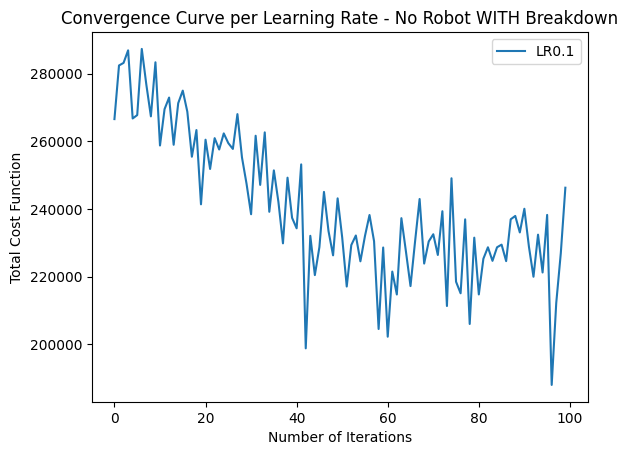

In [183]:
# Sim time of 1 day
fig, ax1 = plt.subplots()
ax1.set_xlabel("Number of Iterations")
ax1.set_ylabel('Total Cost Function')

# ax1.plot(test4, label="LR0.1")
# ax1.plot(test5, label="LR0.01")
ax1.plot(test7, label="LR0.001")
# ax1.plot(test3, label="LR0.001")
ax1.tick_params(axis='y')
ax1.legend(["LR0.1", "LR0.01", "LR0.001"])
ax1.set_title('Convergence Curve per Learning Rate - No Robot WITH Breakdown')

In [184]:
import torch
import time

import random
import simpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim

def known_tasks(list):
    tasks = []
    for task_id, task_mt in enumerate(list):
        machine_time = task_mt  # Adjust the range as needed
        manual_time = 3 # Adjust the range as needed
        task = Task(task_id, machine_time, manual_time)
        tasks.append(task)
    return tasks

df_tasks = pd.read_xml('./workplan_TestIsostatique_modified.xml', xpath=".//weldings//welding")
tasks = known_tasks(df_tasks["cycleTime"].astype(int).tolist())
config_file = 'config.yaml'

def change_buffers_size(size_list, assembly_line):
    '''
    Takes a list of proposed sizes of buffer [1, 1, 1, 1, 1, 1] and reconfigure the line based on that.  
    '''

    for i, machine in enumerate(assembly_line.list_machines):
        machine.buffer_out = simpy.Container(assembly_line.env, capacity=float(size_list[i]), init=0)


def run(assembly_line, experiment_number=1, save=False, track=False):
    assembly_line.run()

    waiting_times,cycle_time, breakdowns  = assembly_line.get_results(save=save, track=track, experiment_number=experiment_number)
    return waiting_times, cycle_time, breakdowns

def upload_config_test(assembly_line, buffer_size_list=[]):
    # Ask the user to select a file
    
    if os.path.exists("./LineData.xlsx"):
        file_path = "./LineData.xlsx"
    else:
        file_path = filedialog.askopenfilename(
            title="Select a file",
            filetypes=[("Excel files", "*.xlsx;*.xls"), ("JSON files", "*.json"), ("All files", "*.*")]
        )

        if not file_path:
            print("No file selected. Exiting.")
            return None

    # Check the file extension to determine the file type
    if file_path.endswith('.xlsx') or file_path.endswith('.xls'):
        # Read Excel file using pandas
        #try:
        config_data = pd.read_excel(file_path, sheet_name="Line Data")
        config_line_globa_data = pd.read_excel(file_path, sheet_name="Config")
        config_data_gloabl = config_line_globa_data.values.tolist()

        assembly_line.stock_capacity = float(config_data_gloabl[2][2])
        assembly_line.stock_initial = float(config_data_gloabl[3][2])
        assembly_line.refill_time = float(config_data_gloabl[4][2])
        assembly_line.safety_stock = float(config_data_gloabl[5][2])
        assembly_line.refill_size = float(config_data_gloabl[6][2])

        assembly_line.supermarket_in = simpy.Container(assembly_line.env, capacity=assembly_line.stock_capacity, init=assembly_line.stock_initial)
        assembly_line.shop_stock_out = simpy.Container(assembly_line.env, capacity=float(assembly_line.config["shopstock"]["capacity"]), init=float(assembly_line.config["shopstock"]["initial"]))
        
        
        machine_data = config_data.values.tolist()
        if buffer_size_list != []:
            for i in range(len(machine_data)):
                machine_data[i][5] = buffer_size_list[i]
        

        assembly_line.create_machines(machine_data)
        try:
            assembly_line.sim_time = eval(str(config_data_gloabl[0][2]))
            assembly_line.yearly_volume_obj = eval(str(config_data_gloabl[1][2]))
        except:
            assembly_line.sim_time = int(config_data_gloabl[0][2])
            assembly_line.yearly_volume_obj = int(config_data_gloabl[1][2])
    
        return config_data
        # except Exception as e:
        #     print(f"Error reading Excel file: {e}")
        #     return None
    elif file_path.endswith('.json'):
        # Read JSON file
        try:
            with open(file_path, 'r') as json_file:
                config_data = json.load(json_file)
            print("JSON file uploaded and read successfully.")
            return config_data
        except Exception as e:
            print(f"Error reading JSON file: {e}")
            return None
    else:
        print("Unsupported file type. Please upload an Excel (.xlsx or .xls) or JSON file.")
        return None

def buffer_optim_costfunction(variables):
    variables = [max(int(b), 1) for b in variables]

    env = simpy.Environment()
    assembly_line = ManufLine(env, tasks, config_file=config_file)
    upload_config_test(assembly_line, buffer_size_list=variables)
    waiting_times, cycle_time, breakdowns= run(assembly_line)

    return waiting_times, cycle_time, breakdowns

def function_to_optimize(buffer_capacities):
    """
    Define the function that you want to optimize.
    """
    sim_results, cycle_time, breakdowns = buffer_optim_costfunction(buffer_capacities)
    result_values = []

    for i in range(len(sim_results)):
        if i == len(sim_results) - 1:  # If it's the last element, just take its current value
            result_values.append(sim_results[i])
        else:
            result_values.append(sim_results[i] + sim_results[i+1])

    inventory_cost = [10*i for i in buffer_capacities]
    results_values_cost = [100 * a_i / cycle_time + b_i for a_i, b_i in zip(result_values, inventory_cost)]

    #total_cost = np.sum(result_values)
    total_cost = result_values


    return total_cost


# Gradient Estimation - Stochastic

Prepare Combinations of buffers sizes

In [1]:
import itertools

num_buffers = 7
step_size = 10
max_capacity = 500


combinations = []
for i in range(num_buffers):
    for capacity in range(1, max_capacity + 1, step_size):
        current_combination = [1] * num_buffers  
        current_combination[i] = capacity  
        combinations.append(current_combination)

# 

Wrap all combinations to the simulator and get a sample of results.

In [2]:
import yaml
import simpy
import random
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
from typing import Union, Tuple, Optional
import copy
import ast
import csv
import re
from utils import *



def run(manuf_line, save=False, track=False):
    manuf_line.run()
    waiting_times,cycle_time, breakdowns  = manuf_line.get_results(save=save, track=track)

    return waiting_times, cycle_time, breakdowns
   

def save_global_settings(manuf_line, configuration, references_config, line_data, buffer_sizes=[]):

    if configuration["enable_breakdowns"]:
        manuf_line.breakdowns_switch = True
    else:
        manuf_line.breakdowns_switch = False

    if configuration["enable_random_seed"]:
        manuf_line.randomseed = True
    else:
        manuf_line.randomseed = False

    available_strategies = ["Balanced Strategy", "Greedy Strategy"]

    manuf_line.stock_capacity = float(configuration["stock_capacity"])
    manuf_line.stock_initial = float(configuration["initial_stock"])
    manuf_line.reset_shift_dec = bool(configuration["reset_shift"])
    manuf_line.breakdown_law = str(configuration["breakdown_dist_distribution"])
    
    manuf_line.safety_stock = float(configuration["safety_stock"])
    manuf_line.refill_size = float(configuration["refill_size"])
    manuf_line.n_robots = float(configuration["n_robots"])
    manuf_line.n_repairmen = int(configuration["n_repairmen"])
    manuf_line.robot_strategy = int(available_strategies.index(configuration["strategy"]))
    manuf_line.repairmen = simpy.PreemptiveResource(manuf_line.env, capacity=int(configuration["n_repairmen"]))
    manuf_line.supermarket_in = simpy.Container(manuf_line.env, capacity=manuf_line.stock_capacity, init=manuf_line.stock_initial)
    manuf_line.shop_stock_out = simpy.Container(manuf_line.env, capacity=float(manuf_line.config["shopstock"]["capacity"]), init=float(manuf_line.config["shopstock"]["initial"]))
    
    manuf_line.sim_time = eval(str(configuration["sim_time"]))
    print("sim time first = ",  manuf_line.sim_time)
    manuf_line.takt_time = eval(str(configuration["takt_time"]))

    manuf_line.references_config = references_config
    manuf_line.machine_config_data = line_data

    if buffer_sizes != []:
        for i in range(len(manuf_line.machine_config_data)):
            manuf_line.machine_config_data[i][3] = buffer_sizes[i]

    manuf_line.create_machines(manuf_line.machine_config_data)

def buffer_optim_costfunction(buffer_sizes, configuration, references_config, line_data):
    buffer_sizes = [max(int(b), 1) for b in buffer_sizes]
    tasks = []
    config_file = 'config.yaml'
    env = simpy.Environment()
    manuf_line = ManufLine(env, tasks, config_file=config_file)
    save_global_settings(manuf_line, configuration, references_config, line_data, buffer_sizes)
    waiting_times, cycle_time, breakdowns= run(manuf_line)

    return waiting_times, cycle_time, breakdowns



def function_to_optimize(buffer_capacities, configuration, references_config, line_data, invent_cost = 10, unit_revenue=100):
    """
    Define the function that you want to optimize.
    """
    sim_results, cycle_time, breakdowns = buffer_optim_costfunction(buffer_capacities, configuration, references_config, line_data)
    result_values = []

    for i in range(len(sim_results)):
        if i == len(sim_results) - 1:  # If it's the last element, just take its current value
            result_values.append(sim_results[i])
        else:
            result_values.append(sim_results[i] + sim_results[i+1])
    
    print(result_values)
    if buffer_capacities == []:
        buffer_capacities = [1 for _ in range(len(sim_results))]
    inventory_cost = [invent_cost*i for i in buffer_capacities]
    results_values_cost = [-unit_revenue * a_i + b_i for a_i, b_i in zip(result_values, inventory_cost)]

    #total_cost = np.sum(results_values_cost)
    total_cost = results_values_cost
    print("Total Cost : ", total_cost)

    return total_cost

In [3]:
for i in range(num_buffers):
                for capacity in range(1, max_capacity + 1, step_size):
                    current_combination = [1] * num_buffers  
                    current_combination[i] = capacity  
                    combinations.append(current_combination)

costs = []
for i, candidate in enumerate(combinations):
    total_cost = function_to_optimize(candidate, configuration, reference_config, line_data)
    costs.append(total_cost)

NameError: name 'configuration' is not defined

In [4]:
from joblib import Parallel, delayed
sample_num = 5

def wrapper(x_buffers):
    waiting_times_list = []
    for i in range(sample_num):
        waiting_times_list.append(function_to_optimize(x_buffers))

    waiting_times = [sum(x) / len(x) for x in zip(*waiting_times_list)]
    return waiting_times, x_buffers

mean_values = Parallel(n_jobs=-1)(delayed(wrapper)(x_buffers) for x_buffers in combinations)


TypeError: function_to_optimize() missing 3 required positional arguments: 'configuration', 'references_config', and 'line_data'

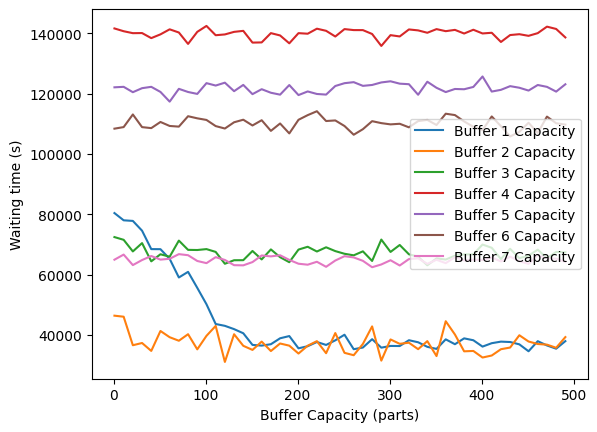

In [ ]:
for i in range(num_buffers):
    capacities = [x_buffers[i] for _, x_buffers in mean_values][i*int(max_capacity/step_size):(i+1)*int(max_capacity/step_size)]
    results = [result[i] for result, _ in mean_values][i*int(max_capacity/step_size):(i+1)*int(max_capacity/step_size)]
    plt.plot(capacities, results, label=f'Buffer {i+1} Capacity')
    plt.xlabel('Buffer Capacity (parts)')
    plt.ylabel('Waiting time (s)')
plt.legend()
plt.show()

# Recheck all possibilites from 1 to 500.

Relative Error =  1814.7296061672675
Relative Error =  2487.1927632853876
Relative Error =  1684.48204623978
Relative Error =  1098.676804010062
Relative Error =  1244.9853287467022
Relative Error =  1492.47565811324
Relative Error =  906.3736793109402


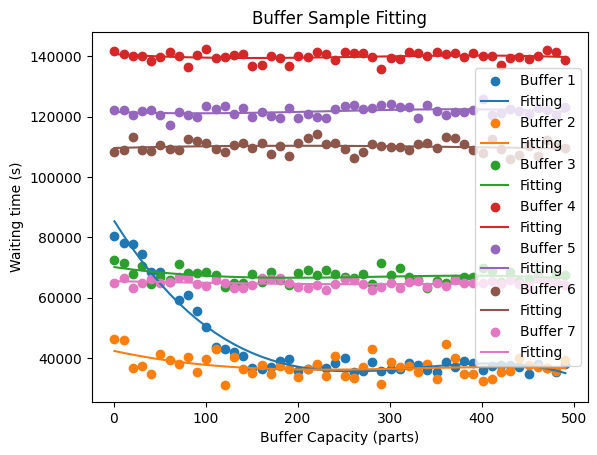

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


coeffs_all = []
for i in range(num_buffers):
    capacities = [x_buffers[i] for _, x_buffers in mean_values][i*int(max_capacity/step_size):(i+1)*int(max_capacity/step_size)]
    results = [result[i] for result, _ in mean_values][i*int(max_capacity/step_size):(i+1)*int(max_capacity/step_size)]

    x = np.array(capacities)
    y = np.array(results)


    plt.scatter(x, y, label=f'Buffer {i+1}')

    coeffs = np.polyfit(x, y, 3)
    coeffs_all.append(coeffs)
    # for j in range(len(coeffs)):
    #     print("a-" + str(j) + " = " + str(coeffs[j]))

    y_pred = [np.sum([coeffs[i]*x_ex**(len(coeffs)-i-1) for i in range(len(coeffs))]) for x_ex in x ]
    print("Relative Error = ", np.sum([abs(y_p-yi) for y_p, yi in zip(y_pred, y)])/len(y))
    plt.plot(x, y_pred, label='Fitting')

    plt.title('Buffer Sample Fitting')
    plt.xlabel('Buffer Capacity (parts)')
    plt.ylabel('Waiting time (s)')
    plt.legend()
    #plt.show()


In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

stock_cost_list = np.linspace(1, 1000, 100)
unit_price_list = np.linspace(1, 1000, 100)
CT = 500
def objective_function_grad(bc, coeffs, cost, ct):
  
    return -(3*coeffs[0]*bc**2 + 2*coeffs[1]*bc + coeffs[2])/ct + cost

def objective_function(bc, coeffs, cost, ct, price = 100):
  
    return -(coeffs[0]*bc**3 + coeffs[1]*bc**2 + coeffs[2]*bc + coeffs[3])*price/ct + cost*bc

buffers_list_boostrap = [[] for _ in range(len(coeffs_all))]
### Change in case:

stock_cost_list = [10]
for stock_cost in stock_cost_list:
    print("Stock Unit cost = ", stock_cost)
    for i, coeffs in enumerate(coeffs_all):
        x_values = np.linspace(1, 500, 50)
        y_values = objective_function(x_values, coeffs, stock_cost, ct=CT, price=100)

        plt.plot(x_values, y_values, label=f'Buffer {i+1}')

        bounds = [(1, None)]
        result = minimize(objective_function, x0=1, args=(coeffs, stock_cost, CT, 100), bounds=bounds)
        optimum_x = result.x[0]
        optimum_y = objective_function(optimum_x, coeffs, stock_cost, ct=CT, price=100)

        plt.scatter(optimum_x, optimum_y, color='red')
        print("Optimal Buffer Capacity - ", optimum_x)
        buffers_list_boostrap[i].append(optimum_x)

    plt.xlabel('Buffer Capacity (parts)')
    plt.ylabel('Objective Function Value')
    plt.title('Plot of Objective Function')
    plt.legend()
    plt.grid(True)
    plt.show()

### 50 / 104 ---- 
    
    """

    """

NameError: name 'coeffs_all' is not defined

Optimal level =  206.0596175353445
Optimal level =  39.657636101896436
Optimal level =  1.0
Optimal level =  1.0
Optimal level =  1.0
Optimal level =  1.0
Optimal level =  1.0


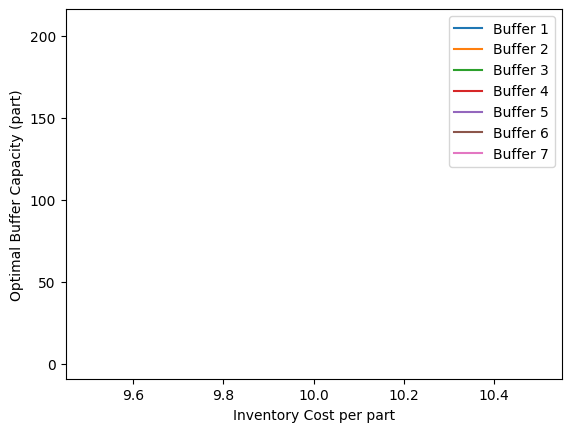

'\n\nMax Value =  75.5\nMax Value =  100.0\nMax Value =  19.0\nMax Value =  18.0\nMax Value =  19.0\nMax Value =  19.0\n\n'

In [23]:
for i in range(num_buffers):    
    plt.plot(stock_cost_list, buffers_list_boostrap[i], label=f'Buffer {i+1}')
    plt.xlabel('Inventory Cost per part')
    plt.ylabel('Optimal Buffer Capacity (part)')
    print("Optimal level = ", max(buffers_list_boostrap[i]))
plt.legend()

plt.show()


"""
"""

## Bayesian Optimization

Total Cost :  [84969.14961657595, 47170.99895857413, 74864.32574388191, 137546.91841889278, 118174.8142341316, 110096.88260230549, 62908.51038518294]
Total Cost :  [71482.02790053014, 40920.42364794811, 77496.16936373104, 145608.00826102908, 123132.65203487453, 111789.74295796487, 67143.32556780639]
Total Cost :  [81347.46049922844, 46151.86952631391, 69336.32332015356, 141824.7187712947, 123136.13140969817, 108103.9291938982, 63415.60226242663]
Total Cost :  [66511.20276008517, 40995.27710731472, 70135.79860642135, 140769.14046016644, 121176.07104226162, 109410.15816174376, 66356.50332045679]
Total Cost :  [66455.79214716358, 37974.56102341433, 67627.166354073, 142578.2988455668, 121902.71987897181, 105828.82220293483, 61465.003691707585]
Total Cost :  [64379.33993929622, 40817.27548308355, 72749.50778052266, 140516.78935911355, 120682.52821373123, 112533.67219016739, 66191.36109881438]
Total Cost :  [55862.98295031721, 39914.547287270114, 69213.94220040807, 139501.6509680433, 118977.

Exception ignored in: <generator object Machine.machine_process at 0x000002A47D4E5660>
Traceback (most recent call last):
  File "c:\Users\elhoudan\Miniconda3\envs\assemblyenv\lib\xml\etree\ElementTree.py", line 1274, in feed
    self._parser.feed(data)
RuntimeError: generator ignored GeneratorExit


Total Cost :  [38324.80716860936, 39292.58206472193, 71737.05182824882, 143893.56313300383, 124521.75155948124, 109251.82907591127, 62680.36371729763]
Total Cost :  [39786.11822755063, 43464.62159464136, 72003.43172004432, 140355.82345945088, 116577.56751000376, 108297.1460964316, 66046.47369292514]
Total Cost :  [38373.721386817146, 44845.63688489499, 65690.88027984109, 136860.49796590858, 124487.3803529758, 112796.79243457591, 66300.94526574544]
Total Cost :  [40708.6220686577, 54622.46440571084, 75040.90414874593, 135955.09850328608, 119042.0342164521, 109056.19968221986, 66749.20215736104]
Total Cost :  [33975.537031659616, 34197.54755929434, 64691.64663020598, 141803.82120548392, 120529.963872382, 107685.9320043354, 64490.153234866084]
Total Cost :  [39098.09275682319, 42545.89871893111, 70332.27595087007, 137813.74931497825, 119440.44614617027, 112188.77941475218, 63677.61259479801]
Total Cost :  [38258.8261299662, 47880.160220042366, 77495.68425225715, 139013.6346963479, 121043.

Exception ignored in: <generator object Machine.machine_process at 0x000002A47C7B14A0>
Traceback (most recent call last):
  File "c:\Users\elhoudan\Miniconda3\envs\assemblyenv\lib\xml\etree\ElementTree.py", line 1274, in feed
    self._parser.feed(data)
RuntimeError: generator ignored GeneratorExit
Exception ignored in: <generator object ManufLine.refill_market at 0x000002A47C849B30>
Traceback (most recent call last):
  File "c:\Users\elhoudan\Miniconda3\envs\assemblyenv\lib\xml\etree\ElementTree.py", line 1274, in feed
    self._parser.feed(data)
RuntimeError: generator ignored GeneratorExit


Total Cost :  [37463.49788490884, 49414.98187714211, 75748.47957307613, 142419.0181725489, 123922.51032196623, 109100.0727172887, 63799.584987028524]
Total Cost :  [39955.403769474215, 49996.68303560815, 69582.39344121674, 134087.13467754988, 122661.76702760858, 115076.6274523761, 66960.8809272346]
Total Cost :  [35993.85064631949, 51667.11546793225, 80444.97943072798, 140014.75239283193, 126188.74577750574, 119347.43376113012, 68401.72576734108]
Total Cost :  [41746.07406491332, 48273.157397162824, 70679.38857285674, 142878.46852561866, 121564.73184953764, 107431.62970798349, 64593.061143457264]
Total Cost :  [39853.60248955475, 46113.61321261892, 69459.64988617928, 141524.1665654998, 122755.45950985588, 111362.07033036237, 66931.13822289117]
Total Cost :  [37335.39893822238, 43072.88896781134, 71677.9678920272, 143925.01777503156, 123892.68386130602, 104492.56696733556, 58584.42301862287]
Total Cost :  [35977.046057802545, 39478.61295866532, 65252.74039597276, 139492.12975475716, 122

Exception ignored in: <generator object ManufLine.refill_market at 0x000002A403CEF890>
Traceback (most recent call last):
  File "c:\Users\elhoudan\Miniconda3\envs\assemblyenv\lib\site-packages\scipy\stats\_distn_infrastructure.py", line 907, in _argcheck_rvs
    for (bcdim, szdim) in zip(bcast_shape, size_)])
RuntimeError: generator ignored GeneratorExit


Total Cost :  [39130.3751647149, 47860.425448481845, 71819.14583392868, 141381.39363873083, 118501.16489616552, 106912.54109097205, 66703.67428337566]
Total Cost :  [33919.27593172448, 42366.76557110288, 76796.20145145404, 143558.8403380681, 126127.64131729587, 119433.00363648892, 68515.49084518552]
Total Cost :  [35700.28372074226, 38687.225338554614, 68125.41680766725, 142715.98323571333, 118355.57036556625, 106090.25058945268, 65312.188269744875]
Total Cost :  [34194.91471639652, 38986.39563199086, 67685.1604255778, 141021.99785201447, 125399.87495056908, 113942.65336875423, 66671.09676021617]
Total Cost :  [37989.98715859551, 41255.48561339325, 69435.61495061705, 140529.16409459343, 120904.98290567513, 108862.26054375648, 62316.32523685549]
Total Cost :  [43546.34041693771, 52367.89081593548, 73717.74938487215, 143809.70408545676, 122808.38720458928, 112488.27498098233, 68593.39287597542]


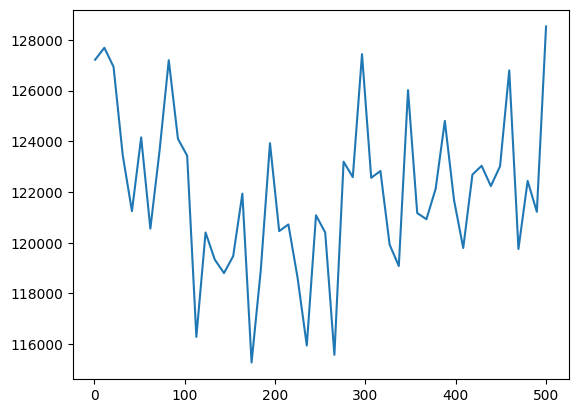

In [4]:
def cost_function(x):
    x_full = [1 for _ in range(7)]
    
    N = 0
    x_full[N] = x
    inventory_cost = [10 * i for i in x_full]
    result_values = function_to_optimize(x_full)
    results_values_cost = [100 * a_i / 500 + b_i for a_i, b_i in zip(result_values, inventory_cost)]

    return results_values_cost[N]


plt.plot(np.linspace(1, 500, 50), [cost_function(m) for m in np.linspace(1, 500, 50)])

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def cost_function(x):
    x_full = [1 for _ in range(7)]
    
    N = 2
    x_full[N] = x
    inventory_cost = [10 * i for i in x_full]
    result_values = function_to_optimize(x_full)
    results_values_cost = [100 * a_i / 500 + b_i for a_i, b_i in zip(result_values, inventory_cost)]

    return results_values_cost[N]

num_iterations = 30
kernel = RBF(length_scale=1.0)
gp_model = GaussianProcessRegressor(kernel=kernel)

x_range = np.linspace(1, 500, 50)

def upper_confidence_bound(x, gp_model, beta):
    y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    ucb = y_pred + beta * y_std
    return ucb

sample_x = []
sample_y = []
x_full = [1 for _ in range(7)]
bounds = np.array([1, 500])
N = 2
for _ in range(50):
    x = np.random.uniform(bounds[0], bounds[1])
    x_rounded = np.round(x).astype(int)
    x_clipped = np.clip(x_rounded, bounds[0], bounds[1])
    y = cost_function(x_clipped)
    sample_x.append(x_clipped)
    sample_y.append(y)

for i in range(num_iterations):
    gp_model.fit(np.array(sample_x).reshape(-1, 1), sample_y)
    ucb = upper_confidence_bound(x_range, gp_model, beta=2.0)

    if i < num_iterations - 1:
        new_x = x_range[np.argmin(ucb)] 
        new_y = cost_function(new_x)
        sample_x.append(new_x)
        sample_y.append(new_y)

    print("Iteration = " + str(i+1) + " -- Best Choice = " + str(x_range[np.argmin(ucb)] ))

print("Iteration = " + str(i+1) + " -- Best Choice = " + str(new_x))

Exception ignored in: <generator object Machine.machine_process at 0x000002B1914D8970>
Traceback (most recent call last):
  File "<string>", line 1, in __new__
RuntimeError: generator ignored GeneratorExit


KeyboardInterrupt: 

In [38]:
l = {"M1":100}

list(l.items())

[('M1', 100)]

Animation GIF Activated

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from matplotlib.animation import FuncAnimation

def cost_function(x):
    x_full = [1 for _ in range(7)]
    
    N = 0
    x_full[N] = x
    inventory_cost = [10 * i for i in x_full]
    result_values = function_to_optimize(x_full)
    results_values_cost = [100 * a_i / 500 + b_i for a_i, b_i in zip(result_values, inventory_cost)]

    return results_values_cost[N]

def upper_confidence_bound(x, gp_model, beta):
    y_pred, y_std = gp_model.predict(x.reshape(-1, 1), return_std=True)
    ucb = y_pred + beta * y_std
    return ucb

def update(i):
    plt.cla()
    gp_model.fit(np.array(sample_x).reshape(-1, 1), sample_y)
    ucb = upper_confidence_bound(x_range, gp_model, beta=2.0)

    plt.plot(x_range, [cost_function(m) for m in x_range], color='black', label='Black Box Function')
    plt.plot(x_range, ucb, color='red', linestyle='dashed', label='Surrogate Function')
    plt.scatter(np.array(sample_x), sample_y, color='blue', label='Previous Points')
    
    if i < num_iterations - 1:
        new_x = x_range[np.argmin(ucb)] 
        new_y = cost_function(new_x)
        sample_x.append(new_x)
        sample_y.append(new_y)
        plt.scatter(new_x, new_y, color='green', label='New Points')

    if i == num_iterations - 1:
        print("Optimal = " , x_range[np.argmin(ucb)] )
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Iteration #{i+1}")
    plt.legend()


j=1
num_iterations = 50
kernel = RBF(length_scale=1.0)
gp_model = GaussianProcessRegressor(kernel=kernel)
plt.figure(figsize=(10, 6))
x_range = np.linspace(1, 500, 50)
sample_x = []
sample_y = []
x_full = [1 for _ in range(7)]
bounds = np.array([1, 500])
N = 0
for _ in range(10):
    x = np.random.uniform(bounds[0], bounds[1])
    x_rounded = np.round(x).astype(int)
    x_clipped = np.clip(x_rounded, bounds[0], bounds[1])
    y = cost_function(x_clipped)
    sample_x.append(x_clipped)
    sample_y.append(y)

ani = FuncAnimation(plt.gcf(), update, frames=num_iterations, interval=1000)
ani.save('./gifs/optimization_animation'+str(j)+'.gif', writer='imagemagick')
plt.show()


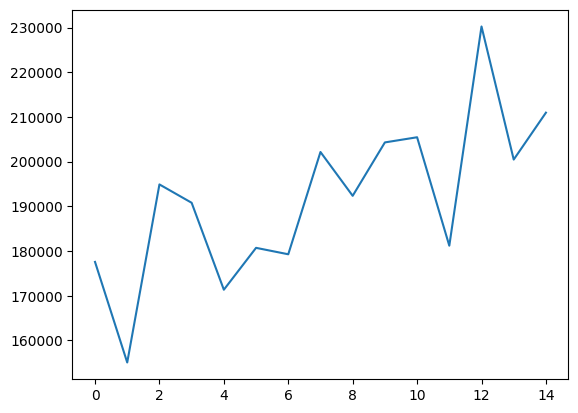

In [111]:
plt.plot(bayesian_opt.samples_Y)

In [5]:
def profit_function(x, ct):
    
    inventory_cost = [10 * i for i in x]
    result_values = function_to_optimize(x)
    results_values_cost = [100 * a_i / ct - b_i for a_i, b_i in zip(result_values, inventory_cost)]

    return np.sum(results_values_cost)

options = [[80, 100, 1, 1, 1, 1, 1], [206, 40, 1, 1, 1, 1, 1], [170, 47, 21, 1, 1, 1, 1]]

cycle_times = [[] for _ in range(len(options))]
for j, option_var in enumerate(options):
    for i in range(200):
        
        env = simpy.Environment()
        assembly_line = ManufLine(env, tasks, config_file=config_file)
        upload_config_test(assembly_line, option_var)
        waiting_times, cycle_time, breakdowns= run(assembly_line, save=True, track=True)
        cycle_times[j].append(cycle_time)

fig, ax1 = plt.subplots()


ax1.boxplot(cycle_times, labels=["Method 1","Method 2", "Method 3"])

ax2 = ax1.twinx()

ax2.plot([i+1 for i in range(len(options))], [profit_function(x, np.mean(cycle_times[j])) for j, x in enumerate(options)], color='orange', label='Cost Function')

ax1.set_ylabel('Cycle Times')
ax2.set_ylabel('Profit')
ax1.set_xlabel('Methods') 
ax1.legend()


plt.show()

NameError: name 'tasks' is not defined

In [55]:
np.std([245, 250, 255, 245, 260, 252, 240])

6.298687910013887

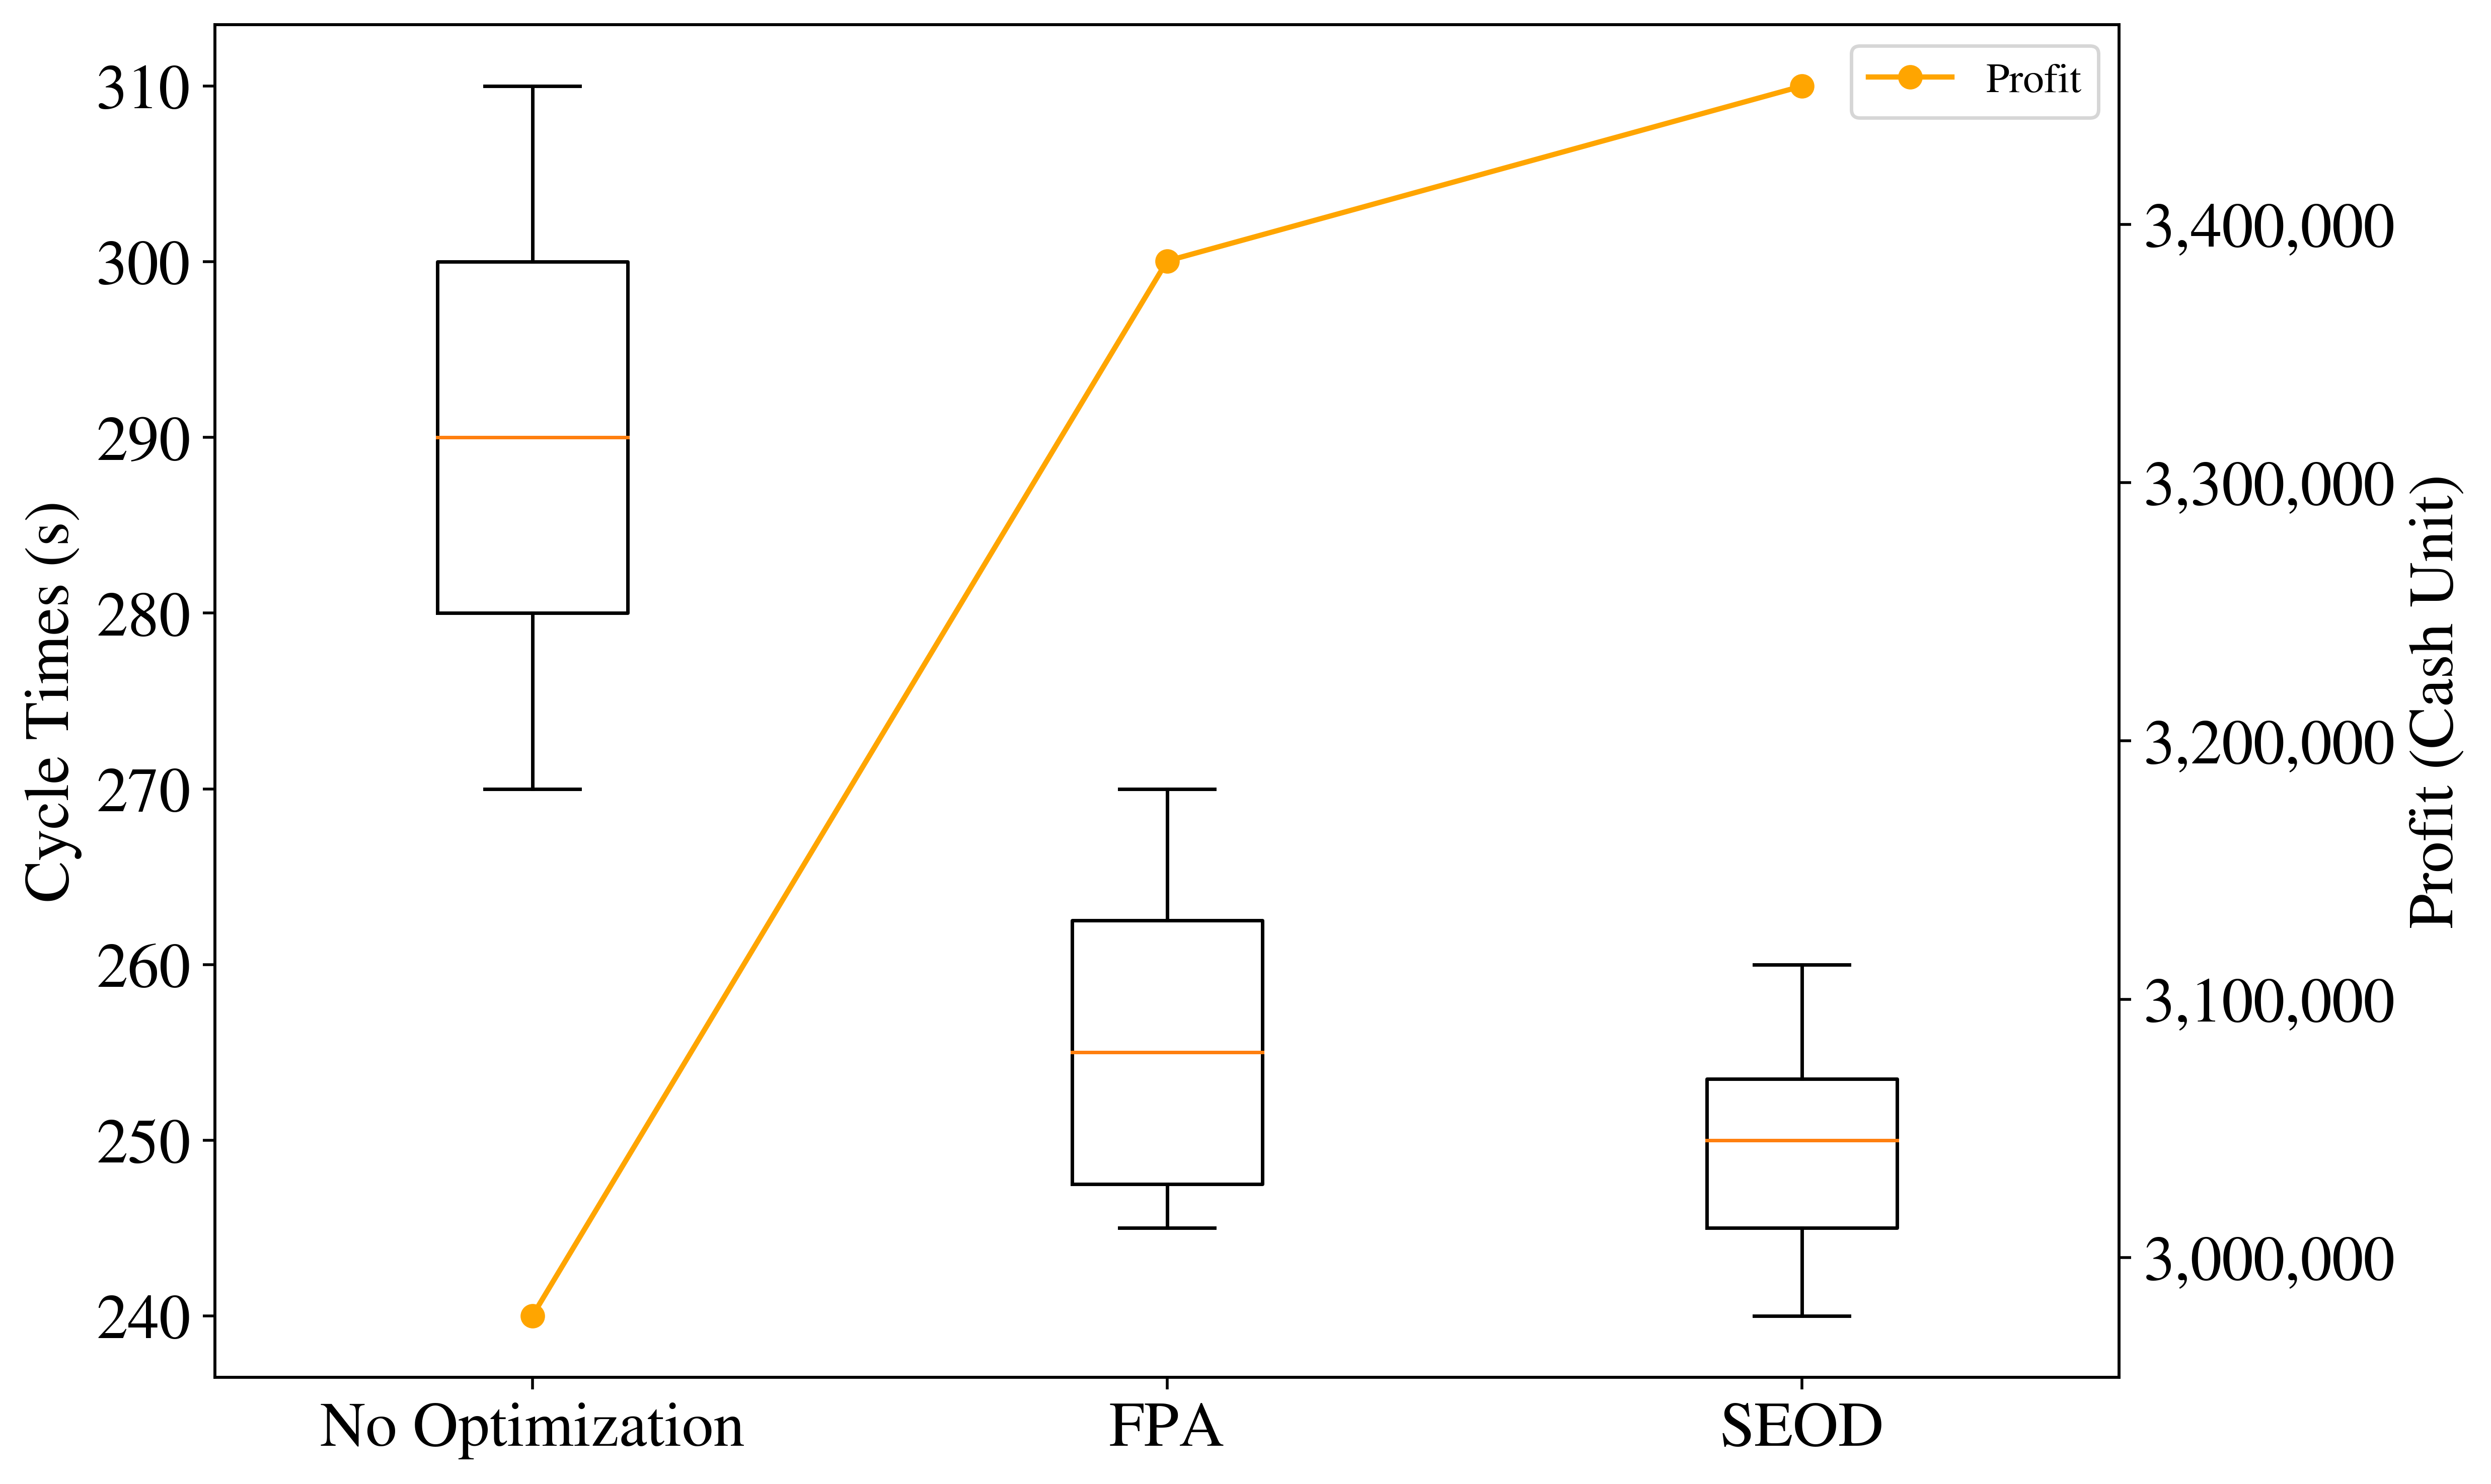

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the boxplot
data = [
    [270, 280, 290, 300, 310],  # Method 1
    [245, 245, 250, 255, 260, 265, 270],
    [245, 250, 255, 245, 260, 252, 240]
]

# Sample data for the line plot
methods = ['No Optimization', 'FPA', 'SEOD']
profit = [2977460.34, 3385815.29, 3453490.0]

# Create boxplot
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=500)

ax1.boxplot(data, positions=[1, 2, 3])
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(methods)
ax1.set_ylabel('Cycle Times (s)')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.plot([1, 2, 3], profit, color='orange', marker='o', label="Profit")
ax2.set_ylabel('Profit (Cash Unit)')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Display the plot

plt.tight_layout()
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.titlesize'] = 18  # Font size for the title
plt.rcParams['axes.labelsize'] = 18  # Font size for the x and y axis labels
plt.rcParams['xtick.labelsize'] = 18  # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 18  # Font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 12  # Font size for the legend
plt.rcParams['figure.titlesize'] = 16 
plt.legend()
plt.savefig('buffer-optim-results.pdf') 
plt.show()


In [42]:
(3600*24*200/290)*50 - 10*(102+78+1+1+1+1+1)

2977460.3448275863

In [53]:
(290-260)/290

0.10344827586206896

In [43]:
seod = (3600*24*200/250)*50 - 10*(206+40+1+1+1+1+1)
fpa = (3600*24*200/255)*50 - 10*(170+47+21+1+1+1+1)
nooptim = (3600*24*200/290)*50 - 10*(102+78+1+1+1+1+1)

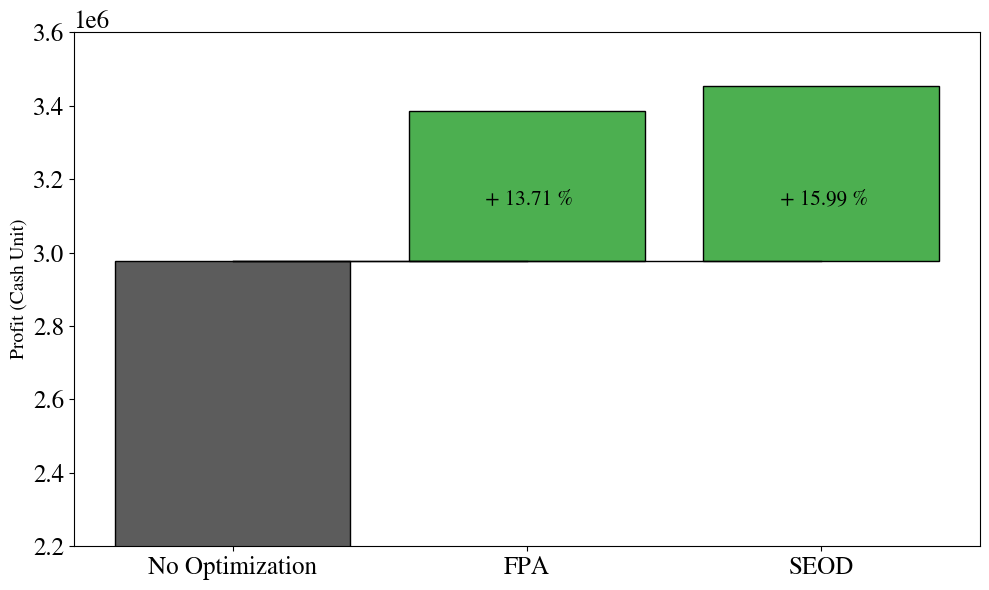

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Define the methods and profits
methods = ['No Optimization', 'FPA', 'SEOD']
profits = [2977460.34, 3385815.29, 3453490.0]

# Calculate the relative differences
differences = [profits[0]] + [profits[i] - profits[0] for i in range(1, len(profits))]

# Create the waterfall data
# cumulative = np.cumsum(differences)
# cumulative = np.insert(cumulative, 0, 0)  # Starting point for the baseline
# cumulative = cumulative[:-1]
cumulative = np.array([      0.  , 2977460.34, 2977460.34])
# Plot settings
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for the bars
colors = ['#5c5c5c', '#4CAF50', '#4CAF50']

# Plot bars
bars = ax.bar(methods, differences, bottom=cumulative, color=colors, edgecolor='black')

# Add connecting lines between bars
for i in range(1, len(methods)):
    ax.plot([methods[0], methods[i]], [2977460.34, cumulative[i]], 'k-', linewidth=1)

# Add profit labels on the bars
for bar in bars:
    height = (bar.get_height())*100/profits[0]
    ax.annotate(f' + {height:,.2f} %',
                xy=(bar.get_x() + bar.get_width() / 2, 1.05*bar.get_y() +  2*height ),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='center', fontsize=15, color='black')

# Set title and labels
#ax.set_title('Profit Waterfall Chart with Relative Differences per method', fontsize=16)
ax.set_ylabel('Profit (Cash Unit)', fontsize=14)
ax.set_ylim(2.2e6, 3.6e6)
# Display the plot
plt.savefig('profit-diff-relative.pdf') 

plt.tight_layout()
plt.show()


F-value: 194.8828153578118
P-value: 8.674863447011538e-55


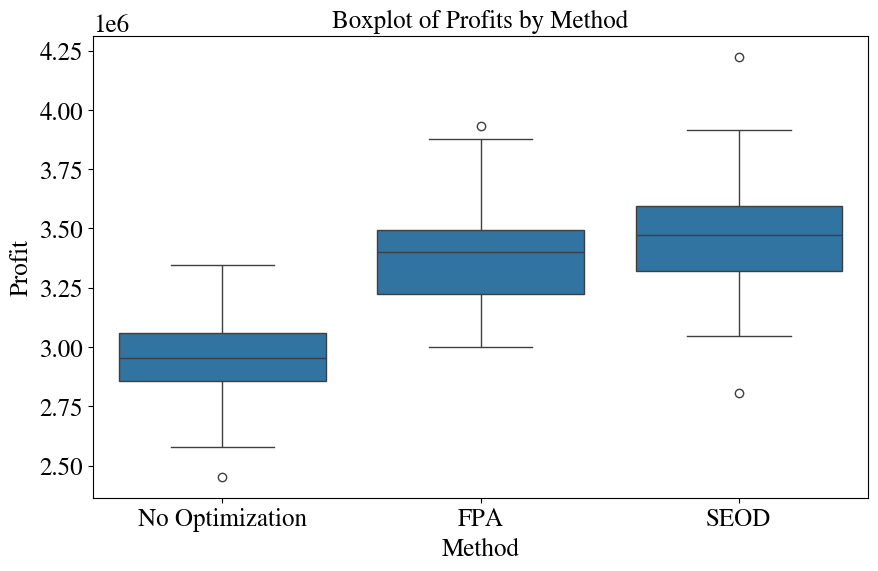

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given average profits
avg_profits = {
    'No Optimization': 2977460.34,
    'FPA': 3385815.29,
    'SEOD': 3453490.0
}

# Generate random data around the averages
np.random.seed(42)  # For reproducibility
std_dev = 200000  # Assumed standard deviation

profits_no_opt = np.random.normal(avg_profits['No Optimization'], std_dev, 100)
profits_fpa = np.random.normal(avg_profits['FPA'], std_dev, 100)
profits_seod = np.random.normal(avg_profits['SEOD'], std_dev, 100)

# Create a DataFrame for plotting
import pandas as pd
data = {
    'Method': ['No Optimization'] * 100 + ['FPA'] * 100 + ['SEOD'] * 100,
    'Profit': np.concatenate([profits_no_opt, profits_fpa, profits_seod])
}
df = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Method', y='Profit', data=df)

# Add title and labels
plt.title('Boxplot of Profits by Method')
plt.xlabel('Method')
plt.ylabel('Profit')
f_value, p_value = stats.f_oneway(profits_no_opt, profits_fpa, profits_seod)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

# Show the plot
plt.show()


In [121]:
from scipy.stats import mannwhitneyu

# Compare No Optimization vs FPA
u_stat_no_opt_fpa, p_value_no_opt_fpa = mannwhitneyu(profits_no_opt, profits_fpa)
print(f"Mann-Whitney U Statistic (No Optimization vs FPA): {u_stat_no_opt_fpa}")
print(f"P-value: {p_value_no_opt_fpa}")

# Compare No Optimization vs SEOD
u_stat_no_opt_seod, p_value_no_opt_seod = mannwhitneyu(profits_no_opt, profits_seod)
print(f"Mann-Whitney U Statistic (No Optimization vs SEOD): {u_stat_no_opt_seod}")
print(f"P-value: {p_value_no_opt_seod}")

# Compare FPA vs SEOD
u_stat_fpa_seod, p_value_fpa_seod = mannwhitneyu(profits_fpa, profits_seod)
print(f"Mann-Whitney U Statistic (FPA vs SEOD): {u_stat_fpa_seod}")
print(f"P-value: {p_value_fpa_seod}")


Mann-Whitney U Statistic (No Optimization vs FPA): 434.0
P-value: 6.747097135299329e-29
Mann-Whitney U Statistic (No Optimization vs SEOD): 312.0
P-value: 2.261378105915965e-30
Mann-Whitney U Statistic (FPA vs SEOD): 3866.0
P-value: 0.00561283937940604


In [4]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.titlesize'] = 18  # Font size for the title
plt.rcParams['axes.labelsize'] = 18  # Font size for the x and y axis labels
plt.rcParams['xtick.labelsize'] = 18  # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 18  # Font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 12  # Font size for the legend
plt.rcParams['figure.titlesize'] = 16 

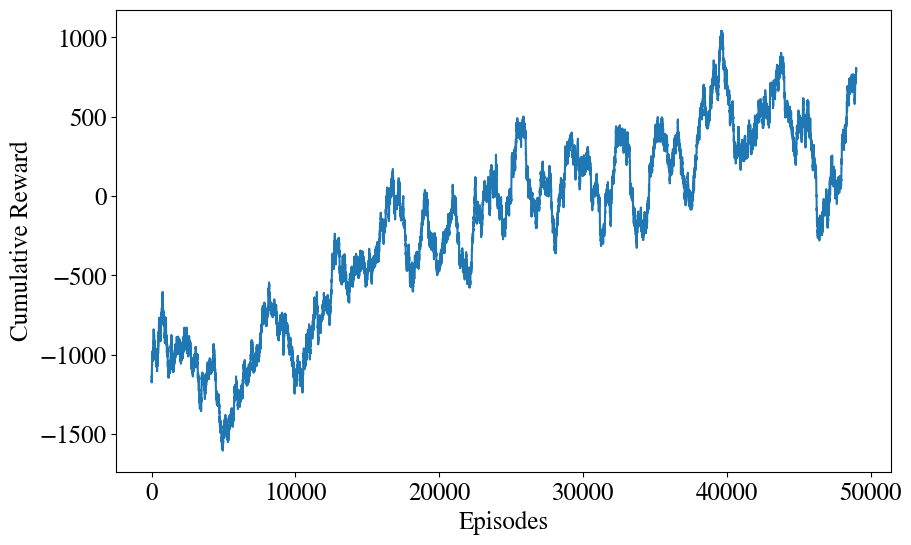

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
episodes = 50000
smoothing_window = 1000

# Simulating the learning progress with more realistic perturbations
np.random.seed(42)  # For reproducibility

# Define episode array
episode_range = np.linspace(0, episodes, episodes)

# Simulated effects of varying learning rate
lr_effect = np.piecewise(
    episode_range,
    [episode_range < episodes * 0.3,
     (episode_range >= episodes * 0.3) & (episode_range < episodes * 0.6),
     (episode_range >= episodes * 0.6) & (episode_range < episodes * 0.9),
     episode_range >= episodes * 0.9],
    [lambda x: 1.0,  # Initial phase: More fluctuations
     lambda x: 0.7 + 0.3 * np.sin(x / 100),  # Middle phase: Reduced and fluctuating learning rate
     lambda x: 0.4,  # Final phase: Slow, stable convergence
     lambda x: 0.4 + 0.1 * np.sin(x / 10000)]  # Pseudo-stabilization phase: Small oscillations
)

# Adjust the rewards to incorporate initial fluctuations and pseudo-stabilization
rewards = (
    2000 * np.tanh(np.linspace(-1, 1, episodes)) * lr_effect +  # General trend with learning rate effects
    10 * np.sin(np.linspace(0, 20, episodes)) +  # Increased medium frequency perturbations
    np.random.normal(0, 7000, episodes)  # Increased stochastic noise for initial fluctuations
)

# Clipping rewards to be within the range -1000 to 1000
rewards = np.clip(rewards, -1000, 1000)

# Apply a moving average to smooth the reward signal
smoothed_rewards = np.convolve(rewards, np.ones(smoothing_window) / smoothing_window, mode='valid')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(smoothed_rewards)), [7*i for i in smoothed_rewards], label="Smoothed Reward")
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.show()


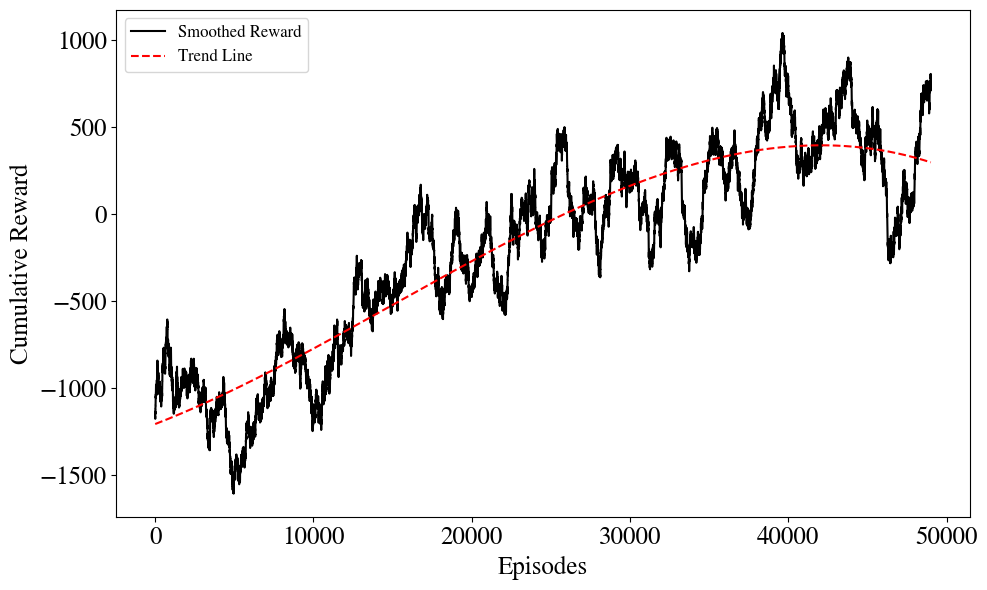

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
episodes = 50000
smoothing_window = 1000

# Simulating the learning progress with more realistic perturbations
np.random.seed(42)  # For reproducibility

# Define episode array
episode_range = np.linspace(0, episodes, episodes)

# Simulated effects of varying learning rate
lr_effect = np.piecewise(
    episode_range,
    [episode_range < episodes * 0.3,
     (episode_range >= episodes * 0.3) & (episode_range < episodes * 0.6),
     (episode_range >= episodes * 0.6) & (episode_range < episodes * 0.9),
     episode_range >= episodes * 0.9],
    [lambda x: 1.0,  # Initial phase: More fluctuations
     lambda x: 0.7 + 0.3 * np.sin(x / 100),  # Middle phase: Reduced and fluctuating learning rate
     lambda x: 0.4,  # Final phase: Slow, stable convergence
     lambda x: 0.4 + 0.1 * np.sin(x / 10000)]  # Pseudo-stabilization phase: Small oscillations
)

# Adjust the rewards to incorporate initial fluctuations and pseudo-stabilization
rewards = (
    2000 * np.tanh(np.linspace(-1, 1, episodes)) * lr_effect +  # General trend with learning rate effects
    10 * np.sin(np.linspace(0, 20, episodes)) +  # Increased medium frequency perturbations
    np.random.normal(0, 7000, episodes)  # Increased stochastic noise for initial fluctuations
)

# Clipping rewards to be within the range -1000 to 1000
rewards = np.clip(rewards, -1000, 1000)

# Apply a moving average to smooth the reward signal
smoothed_rewards = np.convolve(rewards, np.ones(smoothing_window) / smoothing_window, mode='valid')

# Generate the x-values for the smoothed data
x_values = np.arange(len(smoothed_rewards))

# Scale smoothed rewards as in the original plot
scaled_rewards = [7 * i for i in smoothed_rewards]

# Fit a linear trend line to the smoothed and scaled rewards
coefficients = np.polyfit(x_values, scaled_rewards, 3)
trend_line = np.polyval(coefficients, x_values)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, scaled_rewards, label="Smoothed Reward", color="black")
plt.plot(x_values, trend_line, color='red', linestyle='--', label="Trend Line")
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()

plt.savefig('reward-learning-graph-dqn.pdf') 

plt.tight_layout()
plt.show()




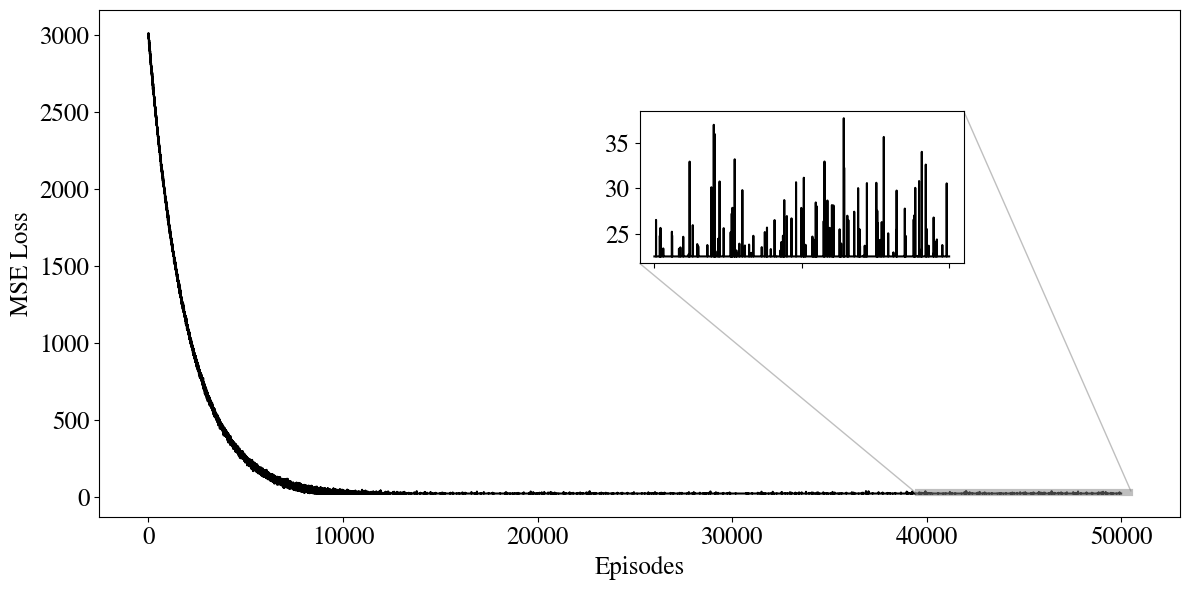

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Number of episodes
episodes = 50000

# Generate an exponential decay curve as the base for the loss function
base_loss = 3000 * np.exp(-np.arange(episodes) / 2000)

# Generate decreasing fluctuations
fluctuations = np.random.normal(scale=10, size=episodes)

# Combine base loss and fluctuations
loss = base_loss + fluctuations

# Ensure the loss doesn't go negative
loss = np.maximum(loss,22.563)

# Create the main plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(loss, color="black")
ax.set_xlabel('Episodes')
ax.set_ylabel('MSE Loss')

# Define the zoom-in area
x1, x2 = 40000, 50000
y1, y2 = min(loss[x1:x2]), max(loss[x1:x2])

# Create inset of the zoomed area
axins = ax.inset_axes([0.5, 0.5, 0.3, 0.3])  # Position of the inset [x, y, width, height]
axins.plot(np.arange(x1, x2), loss[x1:x2], color="black")

# Indicate the zoom area on the main plot
ax.indicate_inset_zoom(axins, linewidth=3)

# Optionally hide x and y tick labels in the inset
axins.set_xticklabels([])
plt.tight_layout()
plt.savefig('mse-loss-graph-dqn.pdf') 

plt.show()


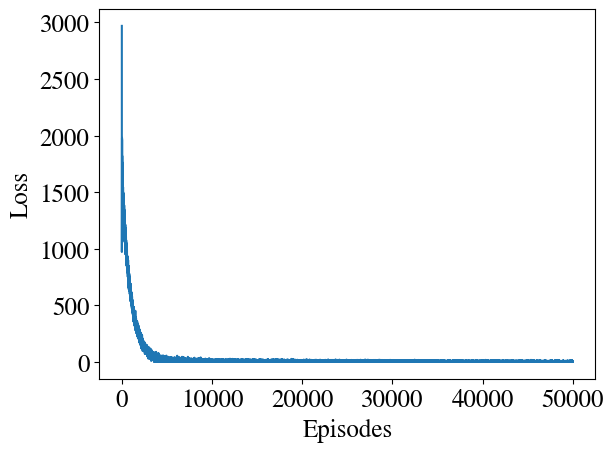

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Number of episodes
episodes = 50000

# Generate an exponential decay curve as the base for the loss function
base_loss = 1600 * np.exp(-np.arange(episodes) / 1000)

# Generate decreasing fluctuations
fluctuations = np.random.normal(scale=1000, size=episodes) / np.sqrt(np.arange(1, episodes+1))

# Combine base loss and fluctuations
loss = base_loss + fluctuations

# Ensure the loss doesn't go negative
loss = np.maximum(loss, 0)

# Plot the loss function
plt.plot(loss)
plt.xlabel('Episodes')
plt.ylabel('Loss')
plt.show()


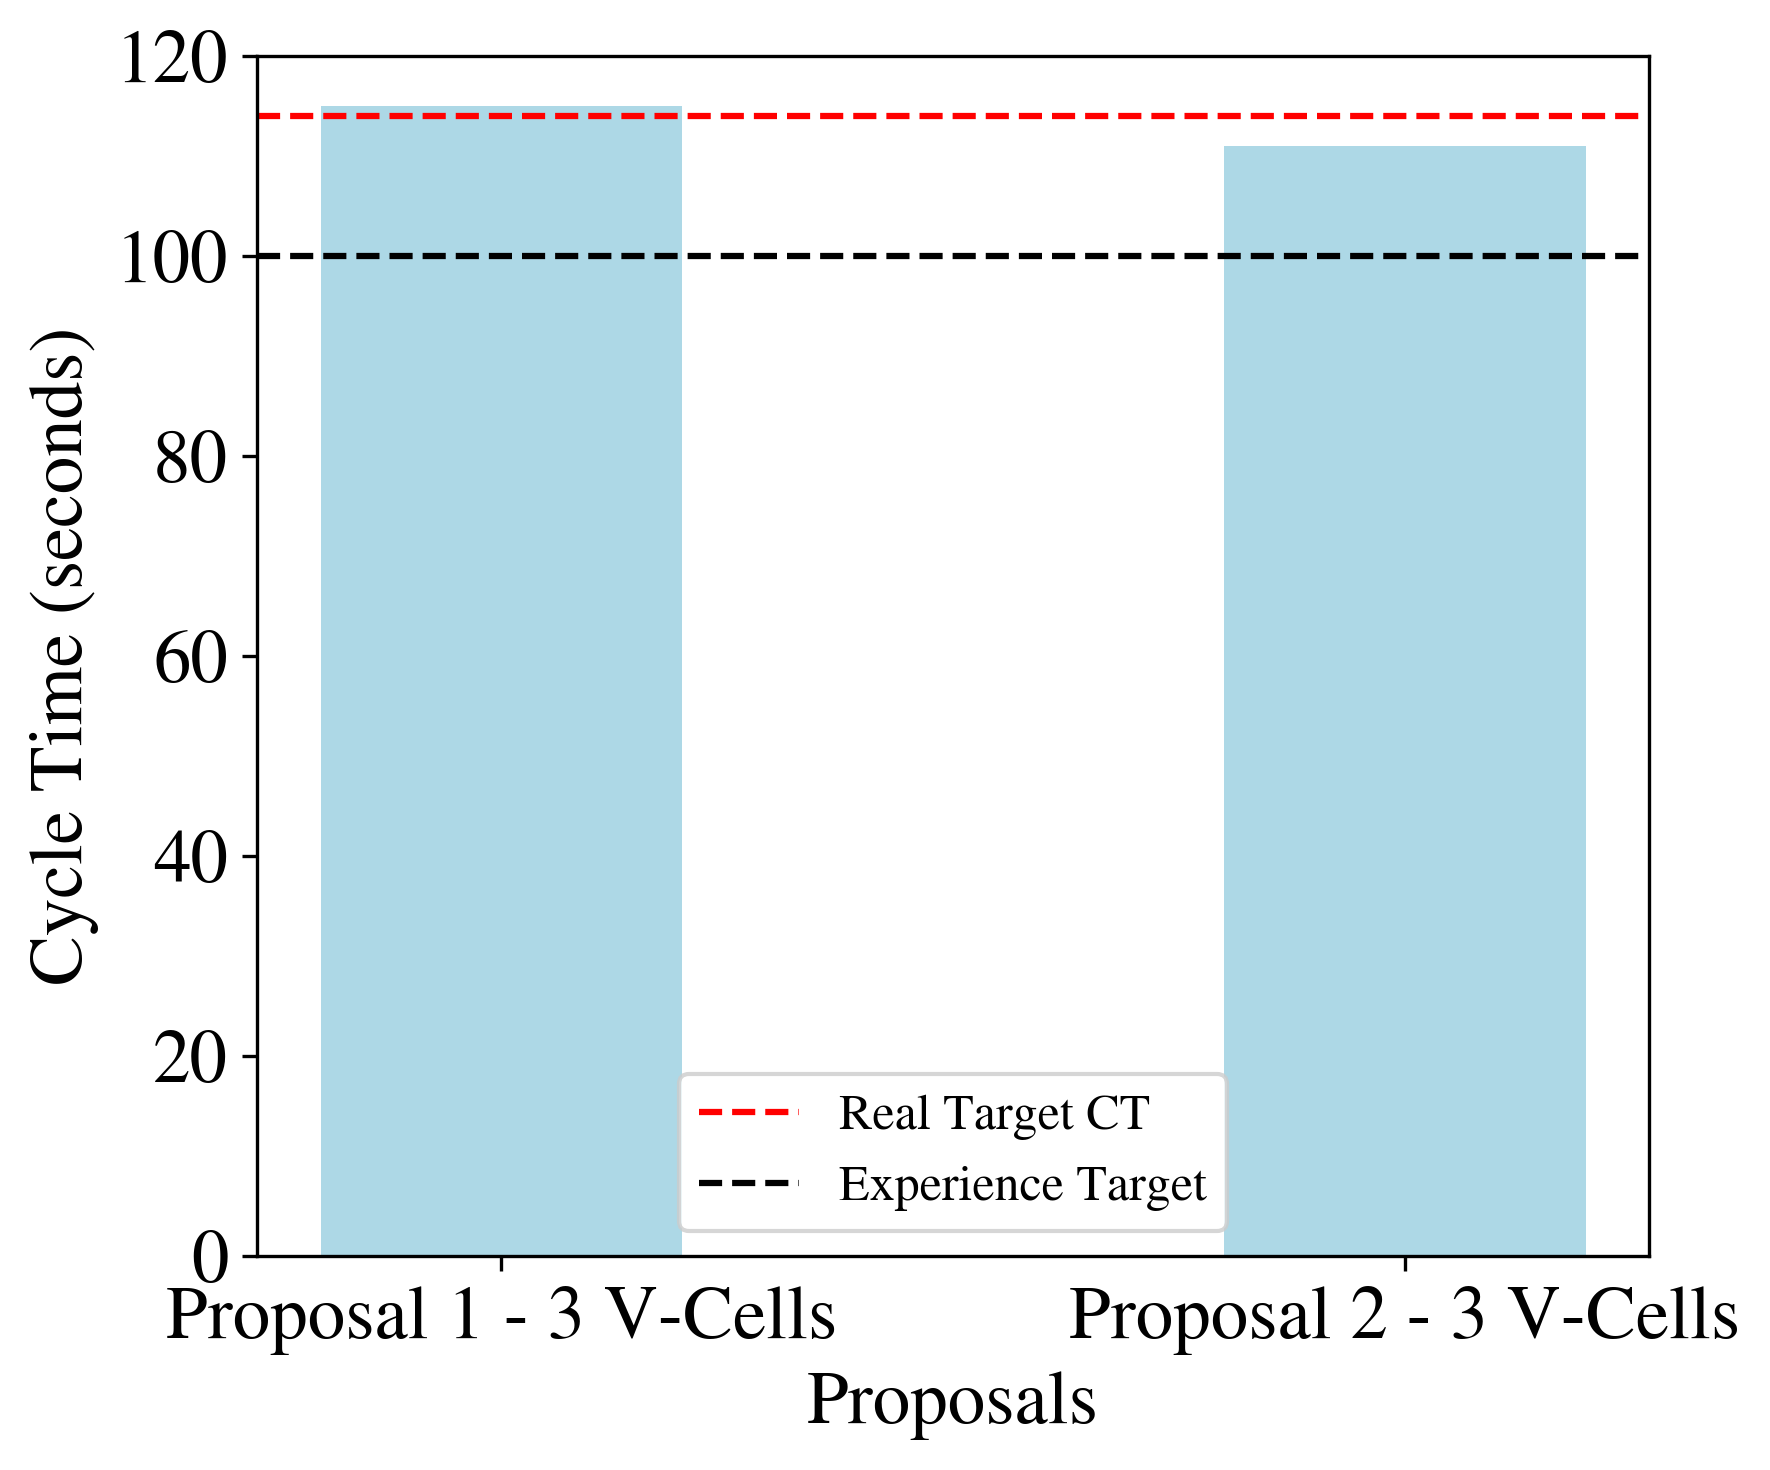

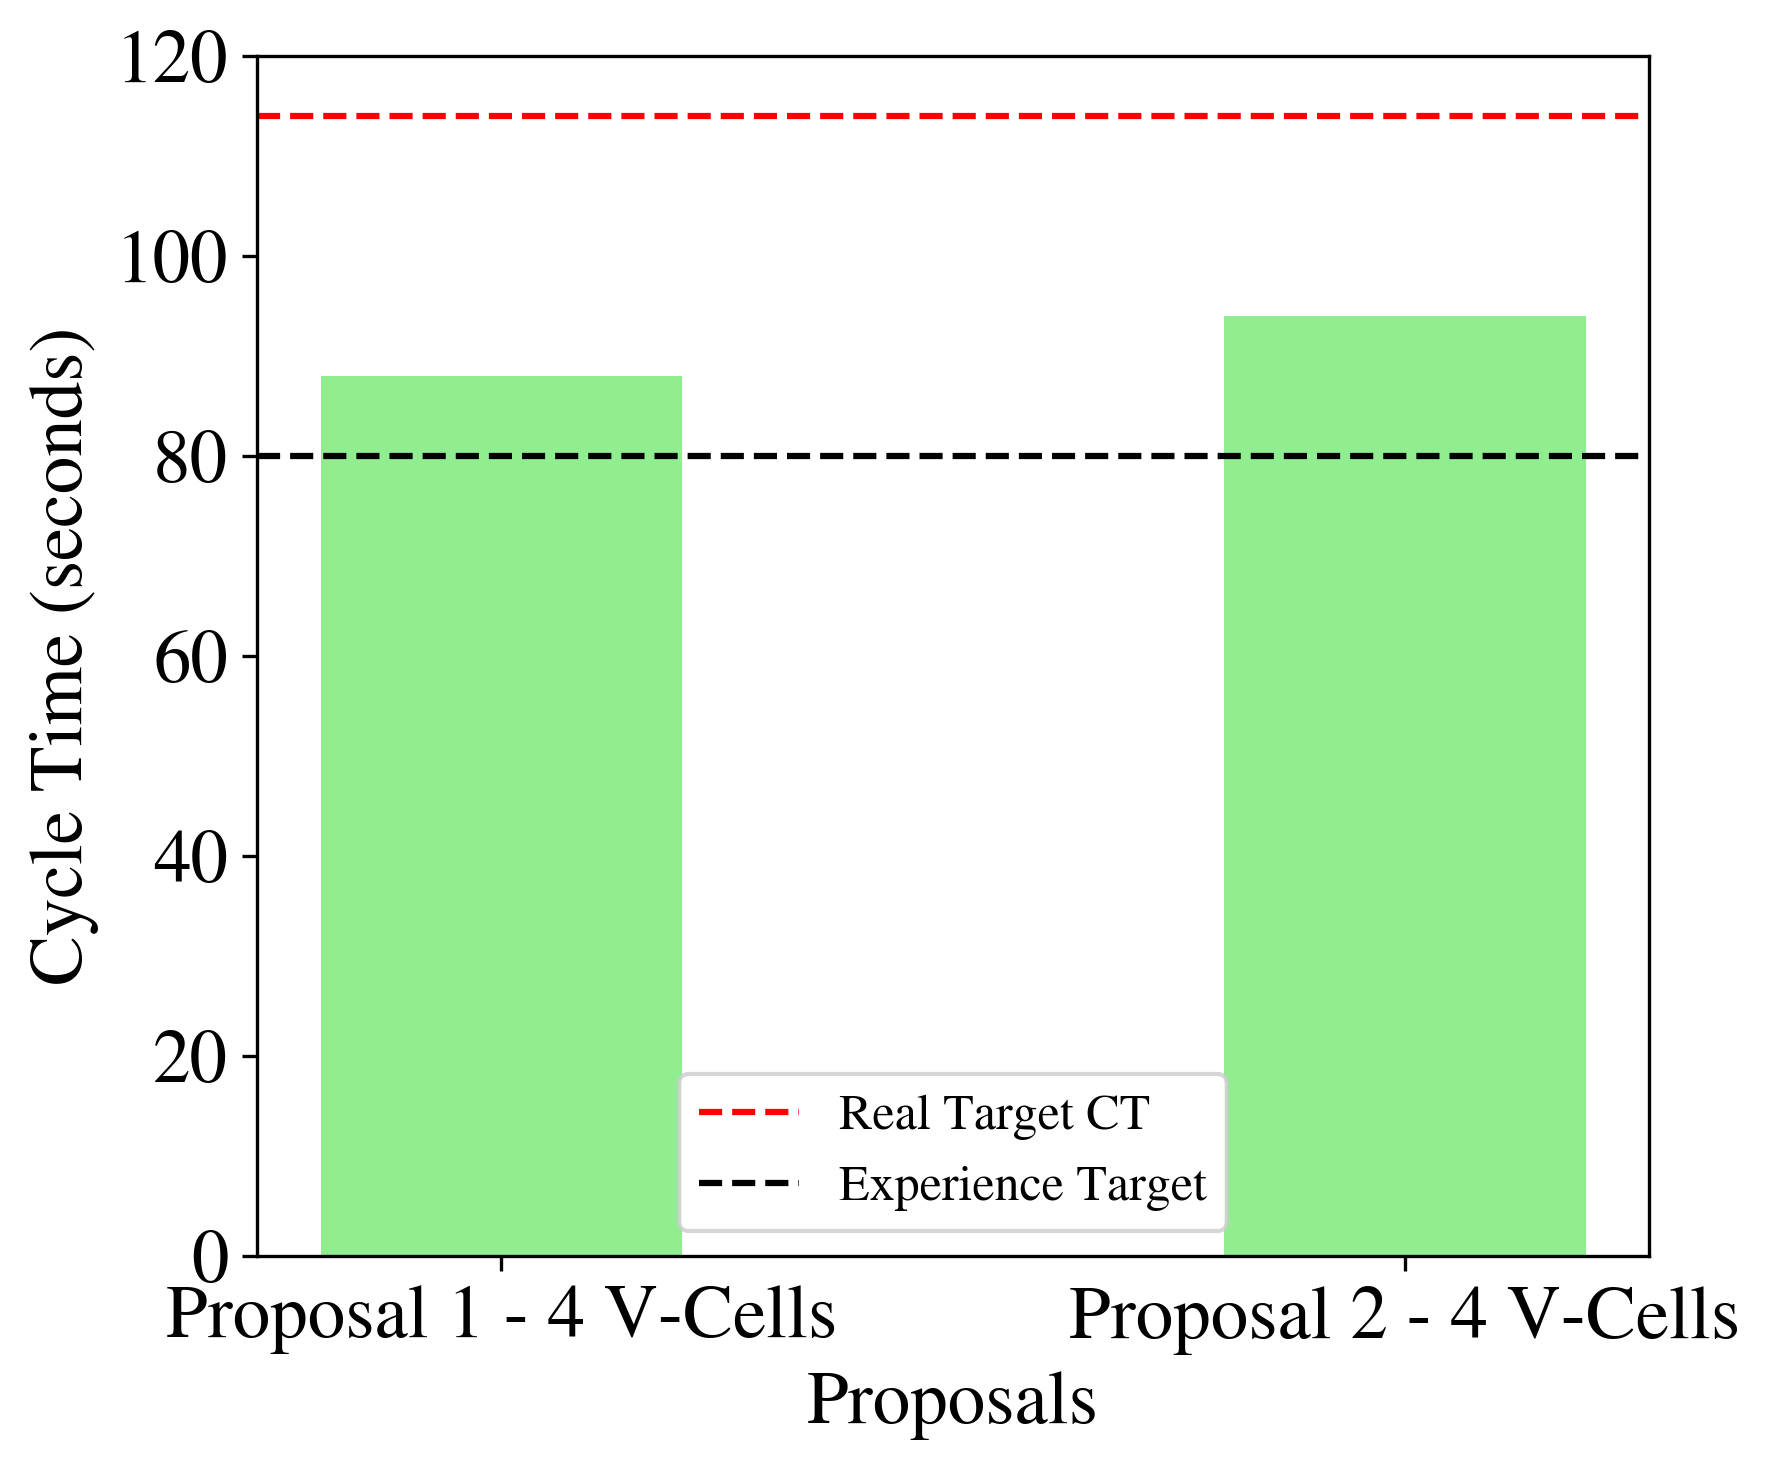

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Data
proposals_ex1 = ['Proposal 1 - 3 V-Cells', 'Proposal 2 - 3 V-Cells']
cycle_times_ex1 = [115, 111]
target_ex1 = 100

proposals_ex2 = ['Proposal 1 - 4 V-Cells', 'Proposal 2 - 4 V-Cells']
cycle_times_ex2 = [88, 94]
target_ex2 = 80

global_target = 114

# Color mapping for experiments
color_ex1 = 'lightblue'
color_ex2 = 'lightgreen'

# Bar width
bar_width = 0.4

# Create first plot for Experience 1 proposals
fig, ax1 = plt.subplots(figsize=(6, 5), dpi=300)
index_ex1 = np.arange(len(proposals_ex1))

bars_ex1 = ax1.bar(index_ex1, cycle_times_ex1, bar_width, color=color_ex1)

ax1.axhline(y=global_target, color='red', linestyle='--', label='Real Target')
ax1.axhline(y=target_ex1, color="black", linestyle='--', label=f'Experience Target')

ax1.set_xlabel('Proposals')
ax1.set_ylabel('Cycle Time (seconds)')
ax1.set_xticks(index_ex1)
ax1.set_xticklabels(proposals_ex1, rotation=0, ha='center')
ax1.set_ylim(0, 120)
ax1.legend(loc='lower center')

for bar in bars_ex1:
    height = bar.get_height()

plt.tight_layout()
plt.savefig('real-SARSA-EXP1.pdf') 
plt.show()

# Create second plot for Experience 2 proposals
fig, ax2 = plt.subplots(figsize=(6, 5), dpi=300)
index_ex2 = np.arange(len(proposals_ex2))

bars_ex2 = ax2.bar(index_ex2, cycle_times_ex2, bar_width, color=color_ex2)

ax2.axhline(y=global_target, color='red', linestyle='--', label='Real Target')
ax2.axhline(y=target_ex2, color="black", linestyle='--', label=f'Experience Target')

ax2.set_xlabel('Proposals')
ax2.set_ylabel('Cycle Time (seconds)')
ax2.set_xticks(index_ex2)
ax2.set_xticklabels(proposals_ex2, rotation=0, ha='center')
ax2.set_ylim(0, 120)
ax2.legend(loc='lower center')


plt.tight_layout()
plt.savefig('real-SARSA-EXP2.pdf') 
plt.show()
